<a href="https://colab.research.google.com/github/artech-0/sql-market-analysis-case-study/blob/main/sql_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
> Background

In the rapidly evolving retail sector, businesses continually seek innovative strategies to stay ahead of the competition, improve customer satisfaction, and optimize operational efficiency. Leveraging data analytics has become a cornerstone for achieving these objectives. This case study focuses on a retail company that has encountered challenges in understanding its sales performance, customer engagement, and inventory management. Through a comprehensive data analysis approach, the company aims to identify high or low sales products, effectively segment its customer base, and analyze customer behavior to enhance marketing strategies, inventory decisions, and overall customer experience.

> Business Problem

The retail company has observed stagnant growth and declining customer engagement metrics over the past quarters. Initial assessments indicate potential issues in product performance variability, ineffective customer segmentation, and a lack of insights into customer purchasing behavior.

The company seeks to leverage its sales transaction data, customer profiles, and product inventory information to address the following key business problems:

* Product Performance Variability: Identifying which products are performing well in terms of sales and which are not. This insight is crucial for inventory management and marketing focus.
* Customer Segmentation: The company lacks a clear understanding of its customer base segmentation. Effective segmentation is essential for targeted marketing and enhancing customer satisfaction.
* Customer Behavior Analysis: Understanding patterns in customer behavior, including repeat purchases and loyalty indicators, is critical for tailoring customer engagement strategies and improving retention rates.


> Objectives

* To utilize SQL queries for data cleaning and exploratory data analysis to ensure data quality and gain initial insights.
* To identify high and low sales products to optimize inventory and tailor marketing efforts.
* To segment customers based on their purchasing behavior for targeted marketing campaigns.
* Create Customer segments

| Total Number of Orders |  Customer Segment  |
|:-----------------------|:------------------:|
| 0                      | No orders          |
| 1 - 10                 | Low                |
| 10 - 30                | Mid                |
| > 30                   | High Value         |
* To analyze customer behavior for insights on repeat purchases and loyalty, informing customer retention strategies.

> Datasets

* Sales Transactions Dataset: Records of sales transactions, including transaction ID, customer ID, product ID, quantity purchased, transaction date, and price.
* Customer Profiles Dataset: Information on customers, including customer ID, age, gender, location, and join date.
* Product Inventory Dataset: Data on product inventory, including product ID, product name, category, stock level, and price.

> Data Cleaning

Remove duplicate transactions and correct any discrepancies in product prices between sales transactions and product inventory. Also, take care of null values.

> Exploratory Data Analysis (EDA)

Perform basic product performance overview, customer purchase frequency analysis, and product categories performance evaluation.

> Detailed Analysis

* High or Low Sales Products: Identify products with the highest and lowest sales to inform inventory decisions. Also, find the sales trends and the m-o-m growth of sales from the dataset.**
* Customer Segmentation: Segment customers based on total products purchased and spending to tailor marketing efforts. Also, identify loyal customers based on duration between purchases.
* Customer Behavior Analysis: Analyze patterns in repeat purchases and loyalty indicators to improve customer retention and satisfaction. Also, segment customers based on the total quantity of products purchased.

# Initialising the files and libraries

In [1]:
!pip install squarify

In [2]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import squarify

In [3]:
def switch_plot_mode(mode):
  if mode == 'dark':
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
  elif mode == 'light':
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'black'
    plt.rcParams['ytick.color'] = 'black'


In [4]:
customers = pd.read_csv('/content/drive/MyDrive/chaicode/datascience/sql_case_study/customer_profiles.csv')
products = pd.read_csv('/content/drive/MyDrive/chaicode/datascience/sql_case_study/product_inventory.csv')
sales = pd.read_csv('/content/drive/MyDrive/chaicode/datascience/sql_case_study/sales_transaction.csv')

In [5]:
conn = sqlite3.connect('/content/drive/MyDrive/chaicode/datascience/sql_case_study/retail_analysis.db')

In [6]:
customers.to_sql('Customers', conn, if_exists='replace', index=False)
products.to_sql('Products', conn, if_exists='replace', index=False)
sales.to_sql('Sales', conn, if_exists='replace', index=False)

5002

In [7]:
# conn.close()

In [8]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)
tables

,name
0,Customers
1,Products
2,Sales


In [9]:
pd.read_sql('SELECT * FROM Customers LIMIT 5', conn)

,CustomerID,Age,Gender,Location,JoinDate
0,1,63,Other,East,01/01/20
1,2,63,Male,North,02/01/20
2,3,34,Other,North,03/01/20
3,4,19,Other,None,04/01/20
4,5,57,Male,North,05/01/20


In [10]:
pd.read_sql('SELECT * FROM Sales LIMIT 5', conn)

,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
0,1,103,120,3,01/01/23,30.43
1,2,436,126,1,01/01/23,15.19
2,3,861,55,3,01/01/23,67.76
3,4,271,27,2,01/01/23,65.77
4,5,107,118,1,01/01/23,14.55


In [11]:
pd.read_sql('SELECT * FROM Products LIMIT 5', conn)

,ProductID,ProductName,Category,StockLevel,Price
0,1,Product_1,Clothing,22,46.11
1,2,Product_2,Home & Kitchen,140,81.60
2,3,Product_3,Home & Kitchen,473,78.72
3,4,Product_4,Clothing,386,22.06
4,5,Product_5,Beauty & Health,284,17.97


# Data Cleaning

Remove duplicate transactions and correct any discrepancies in product prices between sales transactions and product inventory. Also, take care of null values.

### Handling null and duplicate values

In [12]:
# Check for null values in the sales table
query_null_sales = """
SELECT
    *
FROM
    Sales
WHERE
    TransactionID IS NULL OR
    CustomerID IS NULL OR
    ProductID IS NULL OR
    QuantityPurchased IS NULL OR
    TransactionDate IS NULL OR
    Price IS NULL;
"""

null_sales_df = pd.read_sql(query_null_sales, conn)
print("\n--- Checking for Null Values in Sales Table ---")
if null_sales_df.empty:
    print("No rows with null values found in the sales table.")
else:
    print("Found rows with null values:")
    print(null_sales_df)


--- Checking for Null Values in Sales Table ---
No rows with null values found in the sales table.


In [13]:
from os import dup
# check for duplicates in sales table

query_duplicate_sales = """
  SELECT
      CustomerID,
      ProductID,
      QuantityPurchased,
      TransactionDate,
      Price,
      COUNT(*) AS duplicate_count
  FROM
      Sales
  GROUP BY
      CustomerID,
      ProductID,
      QuantityPurchased,
      TransactionDate,
      Price
  HAVING
      COUNT(*) > 1;
  """
duplicate_sales_df = pd.read_sql(query_duplicate_sales, conn)
print("\n--- Checking for Duplicate Values in Sales Table ---")
if duplicate_sales_df.empty:
    print("No rows with duplicate values found in the sales table.")
else:
    print("Found rows with duplicate values:")
    print(duplicate_sales_df)



--- Checking for Duplicate Values in Sales Table ---
Found rows with duplicate values:
   CustomerID  ProductID  QuantityPurchased TransactionDate  Price  \
0         215        159                  2        28/07/23  17.42   
1         904        188                  2        28/07/23  36.22   

   duplicate_count  
0                2  
1                2  


In [14]:
# check for null and duplicate values in products table

# A. Check for duplicate Products
query_duplicate_products = """
SELECT
    ProductName,
    COUNT(*) AS count
FROM
    Products
GROUP BY
    ProductName
HAVING
    count > 1;
"""

duplicate_products_df = pd.read_sql(query_duplicate_products, conn)
print("\n--- Checking for Duplicate Products ---")
if duplicate_products_df.empty:
    print("No duplicate Products found. Perfect.")
else:
    print("Warning: Found duplicate Products:")
    print(duplicate_products_df)

# B. Check for null values in the products table
query_null_products = """
SELECT
    *
FROM
    Products
WHERE
    ProductID IS NULL OR
    ProductName IS NULL OR
    Category IS NULL OR
    StockLevel IS NULL OR
    Price IS NULL;
"""

null_products_df = pd.read_sql(query_null_products, conn)
print("\n--- Checking for Null Values in Products Table ---")
if null_products_df.empty:
    print("No rows with null values found in the products table.")
else:
    print("Found rows with null values:")
    print(null_products_df)


--- Checking for Duplicate Products ---
No duplicate Products found. Perfect.

--- Checking for Null Values in Products Table ---
No rows with null values found in the products table.


In [15]:
# A. Check for duplicate Customers
query_duplicate_customers = """
SELECT
  Age, Gender, Location, JoinDate,
  COUNT(*) AS duplicate_count
FROM
    Customers
GROUP BY
  Age, Gender, Location, JoinDate
HAVING
  duplicate_count > 1;
"""

duplicate_customers_df = pd.read_sql(query_duplicate_customers, conn)
print("--- Checking for Duplicate CustomerIDs ---")
if duplicate_customers_df.empty:
    print("No duplicate Customers found.")
else:
    print("Warning: Found duplicate Customers:")
    print(duplicate_customers_df)

# B. Check for null values in the customers table
query_null_customers = """
SELECT
    *
FROM
    Customers
WHERE
    CustomerID IS NULL OR
    Age IS NULL OR
    Gender IS NULL OR
    Location IS NULL OR
    JoinDate IS NULL;
"""

null_customers_df = pd.read_sql(query_null_customers, conn)
print("\n--- Checking for Null Values in Customers Table ---")
if null_customers_df.empty:
    print("No rows with null values found in the customers table. Great.")
else:
    print("Found rows with null values:")
    print(null_customers_df)

--- Checking for Duplicate CustomerIDs ---
No duplicate Customers found.

--- Checking for Null Values in Customers Table ---
Found rows with null values:
    CustomerID  Age  Gender Location  JoinDate
0            4   19   Other     None  04/01/20
1          113   21    Male     None  02/05/20
2          115   43  Female     None  05/05/20
3          219   23    Male     None  27/08/20
4          239   40   Other     None  18/09/20
5          322   35  Female     None  18/12/20
6          379   27  Female     None  18/02/21
7          405   26  Female     None  19/03/21
8          448   44  Female     None  05/05/21
9          476   45  Female     None  05/06/21
10         517   62   Other     None  20/07/21
11         668  131    Male     None  01/01/22
12         998   22   Other     None  29/12/22


### Defining CTEs for cleaned sales and customers tables

In [16]:
sales_CTE_query = """
WITH sales_cleaned AS (
  SELECT
    TransactionID,
    CustomerID,
    ProductID,
    QuantityPurchased,
    TransactionDate,
    Price
  FROM
    (
      SELECT
        *,
        ROW_NUMBER() OVER (PARTITION BY CustomerID, ProductID, QuantityPurchased, TransactionDate, Price) AS row_num
      FROM
        Sales
    )
  WHERE
    row_num = 1
)
"""


customers_CTE_query = """
WITH customers_cleaned AS (
SELECT
  CustomerID,
  Age,
  Gender,
  COALESCE(Location, 'Unknown') AS Location,
  JoinDate
FROM
  Customers
)
"""



In [17]:
test_query = f"""
{sales_CTE_query}
SELECT * FROM sales_cleaned LIMIT 5;
"""
pd.read_sql(test_query, conn)

,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
0,2761,1,2,4,26/04/23,81.60
1,4935,1,7,3,25/07/23,58.20
2,1358,1,19,2,26/02/23,96.33
3,1586,1,32,3,08/03/23,43.82
4,4512,1,41,4,07/07/23,27.03


In [18]:
test_query = f"""
{customers_CTE_query}
SELECT * FROM customers_cleaned LIMIT 5;
"""
pd.read_sql(test_query, conn)

,CustomerID,Age,Gender,Location,JoinDate
0,1,63,Other,East,01/01/20
1,2,63,Male,North,02/01/20
2,3,34,Other,North,03/01/20
3,4,19,Other,Unknown,04/01/20
4,5,57,Male,North,05/01/20


In [19]:
pd.read_sql(f"""
{sales_CTE_query}
select * from sales_cleaned limit 5
""", conn)

,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
0,2761,1,2,4,26/04/23,81.60
1,4935,1,7,3,25/07/23,58.20
2,1358,1,19,2,26/02/23,96.33
3,1586,1,32,3,08/03/23,43.82
4,4512,1,41,4,07/07/23,27.03


In [20]:
pd.read_sql(f"""
select * from products limit 5
""", conn)

,ProductID,ProductName,Category,StockLevel,Price
0,1,Product_1,Clothing,22,46.11
1,2,Product_2,Home & Kitchen,140,81.60
2,3,Product_3,Home & Kitchen,473,78.72
3,4,Product_4,Clothing,386,22.06
4,5,Product_5,Beauty & Health,284,17.97


### take a look at price discrepancies

In [21]:
join_sales_products_query = f"""
{sales_CTE_query}
SELECT
  s.TransactionID,
  s.CustomerID,
  s.ProductID,
  p.ProductName,

  s.Price AS SalesPrice,
  p.Price AS CatalogPrice
FROM
  sales_cleaned s
JOIN
  products p
ON
  s.ProductID = p.ProductID
WHERE
  s.Price <> p.Price;
"""

pd.read_sql(join_sales_products_query, conn)

,TransactionID,CustomerID,ProductID,ProductName,SalesPrice,CatalogPrice
0,88,562,51,Product_51,9312.0,93.12
1,236,231,51,Product_51,9312.0,93.12
2,591,820,51,Product_51,9312.0,93.12
3,1377,172,51,Product_51,9312.0,93.12
4,1910,482,51,Product_51,9312.0,93.12
5,2608,950,51,Product_51,9312.0,93.12
6,2939,944,51,Product_51,9312.0,93.12
7,3377,422,51,Product_51,9312.0,93.12
8,3635,534,51,Product_51,9312.0,93.12
9,3839,973,51,Product_51,9312.0,93.12


### Analysis on the price discrepancy
We need to decide on the source of truth here. sales.Price is the SOT for revenue whereas products.Price is SOT for the officially sanctioned price of the product. Using sales.price is the correct choice for calculating revenue because it's the "money in the bank."

## Insights from the Data Cleaning Phase -
1. **Insight: Handled Duplicate Transactions**

*What we did:* We defined a "true duplicate" as any transaction where the customer, product, quantity, date, and price were all identical. Using a ROW_NUMBER() window function in SQL, we identified and filtered out these duplicate entries.

*Finding:* We found and removed 2 duplicate transaction records from our analysis set.

*Business Impact:* This prevents the over-inflation of our key metrics. Every dollar of revenue and every unit sold in our analysis now corresponds to a real, unique sale.

2. **Insight: Investigated Price Discrepancies**

*What we did:* We systematically compared the price of each item sold (sales.Price) against its official list price in the product catalog (products.Price).

*Finding & Decision:* We discovered that while most sales matched the catalog, a number of transactions had different prices. These could be due to planned discounts, promotions, or potential data entry errors (like one transaction with an unusually high price of 9312 where the catalog price was only 93.12).

*Our Analytical Decision:* For calculating revenue, we will use the sales.Price as our "source of truth," because it reflects the actual amount paid by the customer. This ensures our financial analysis is grounded in reality.

3. **Insight: Managed Missing Information**

*What we did:* We scanned our customer and product tables for any missing data points.

*Finding:* We identified a small number of records(13) with missing Location.

*Our Analytical Decision:* For now, these records will be kept for overall analysis but will be automatically excluded from any specific analysis where that data is required (e.g., sales by location). This approach maximizes the data we use while maintaining accuracy in our specific reports. We will be utilising CTEs for this

# Exploratory Data Analysis - Sales / Product Performance Overview and Analysis

### Product Performance Overview : Best performing products
Let's understand:

Total Revenue (sum of QuantityPurchased * SalePrice).

Total Quantity Sold.

Orders the results to show the highest-grossing products at the top.

In [22]:
pd.read_sql("""
select * from products limit 5
""",conn)

,ProductID,ProductName,Category,StockLevel,Price
0,1,Product_1,Clothing,22,46.11
1,2,Product_2,Home & Kitchen,140,81.60
2,3,Product_3,Home & Kitchen,473,78.72
3,4,Product_4,Clothing,386,22.06
4,5,Product_5,Beauty & Health,284,17.97


In [23]:
revenue_df = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  ProductID,
  SUM(QuantityPurchased * Price) as TotalRevenue,
  SUM(QuantityPurchased) as TotalQuantitySold

FROM
  sales_cleaned

GROUP BY
  ProductID
ORDER BY
  TotalRevenue desc
""", conn)
revenue_df

,ProductID,TotalRevenue,TotalQuantitySold
0,51,512160.00,55
1,17,9450.00,100
2,87,7817.24,92
3,179,7388.26,86
4,96,7132.32,72
...,...,...,...
195,178,616.55,55
196,20,610.74,58
197,159,609.70,35
198,161,547.50,50


In [24]:
revenue_df = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  s.ProductID,
  SUM(s.QuantityPurchased * s.Price) as TotalRevenue,
  SUM(s.QuantityPurchased) as TotalQuantitySold,
  p.ProductName,
  p.Category
FROM
  sales_cleaned s
JOIN
  Products p
ON
  s.ProductID = p.ProductID

GROUP BY
  s.ProductID
ORDER BY
  TotalRevenue desc
""", conn)
revenue_df

,ProductID,TotalRevenue,TotalQuantitySold,ProductName,Category
0,51,512160.00,55,Product_51,Clothing
1,17,9450.00,100,Product_17,Beauty & Health
2,87,7817.24,92,Product_87,Clothing
3,179,7388.26,86,Product_179,Clothing
4,96,7132.32,72,Product_96,Home & Kitchen
...,...,...,...,...,...
195,178,616.55,55,Product_178,Clothing
196,20,610.74,58,Product_20,Beauty & Health
197,159,609.70,35,Product_159,Beauty & Health
198,161,547.50,50,Product_161,Clothing


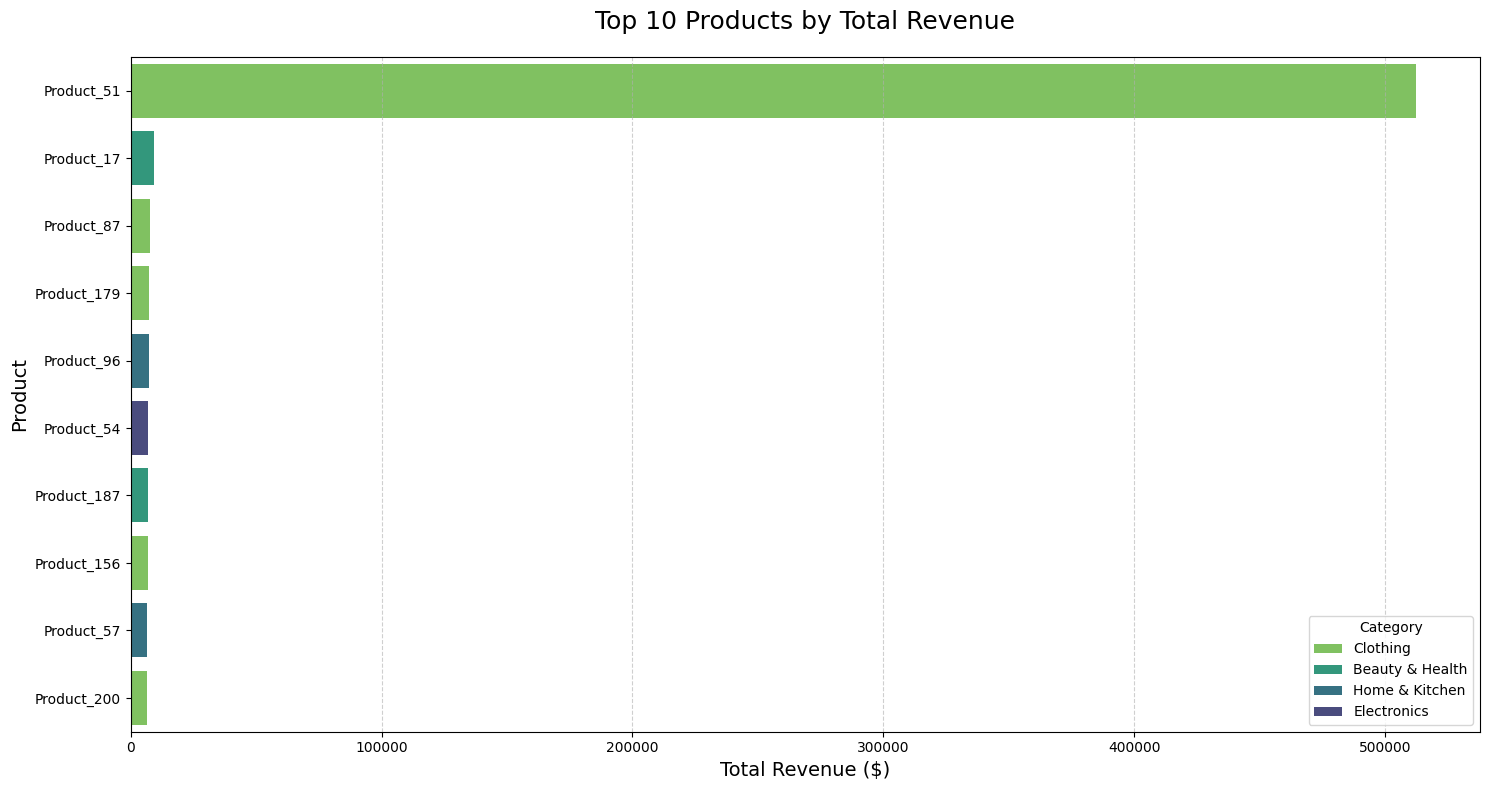

In [25]:
# --- Top 10 Products by Revenue ---
top_n = 10
top_products = revenue_df.head(top_n)
category_revenue = revenue_df.groupby('Category')['TotalRevenue'].sum()
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_products,
    x='TotalRevenue',
    y='ProductName',
    hue='Category',
    palette='viridis_r'
)

plt.title(f'Top {top_n} Products by Total Revenue', fontsize=18, pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights - Critical Data Integrity Issue :

During our initial visualization of top-performing products, a major anomaly was detected that required immediate correction.

Observation: The initial bar chart showed Product_51 as the highest revenue-generating product by an enormous margin. This result is highly improbable and needs investigation.

Root Cause: We traced this anomaly back to a data entry error identified during our data cleaning phase. All 20 Transactions for this product had a sales.Price of 9312 which seems to be a data entry error when considering the catalog price of only 93.12.

This decimal point error created a massively inflated revenue figure.

Considering this data error, we are making a decision to implement the following rule - All revenue calculations going forward will be based on the official catalog price: SUM(sales.QuantityPurchased * products.Price). This ensures our financial metrics are consistent, reliable, and immune to point-of-sale data entry errors.


### Updating the revenue table

In [26]:
revenue_df = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  s.ProductID,
  SUM(s.QuantityPurchased * p.Price) as TotalRevenue,
  SUM(s.QuantityPurchased) as TotalQuantitySold,
  p.ProductName,
  p.Category
FROM
  sales_cleaned s
JOIN
  Products p
ON
  s.ProductID = p.ProductID

GROUP BY
  s.ProductID
ORDER BY
  TotalRevenue desc
""", conn)
revenue_df[['ProductName', 'TotalRevenue', 'TotalQuantitySold']].head(10)

,ProductName,TotalRevenue,TotalQuantitySold
0,Product_17,9450.00,100
1,Product_87,7817.24,92
2,Product_179,7388.26,86
3,Product_96,7132.32,72
4,Product_54,7052.86,86
5,Product_187,6915.88,82
6,Product_156,6827.84,76
7,Product_57,6622.20,78
8,Product_200,6479.79,69
9,Product_127,6415.80,68


In [27]:
# # Light mode setup
# plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional light theme
# plt.rcParams['figure.figsize'] = (12, 6)
# plt.rcParams['font.size'] = 12
# plt.rcParams['text.color'] = 'black'  # Text color is now black
# plt.rcParams['axes.labelcolor'] = 'black'
# plt.rcParams['xtick.color'] = 'black'
# plt.rcParams['ytick.color'] = 'black'

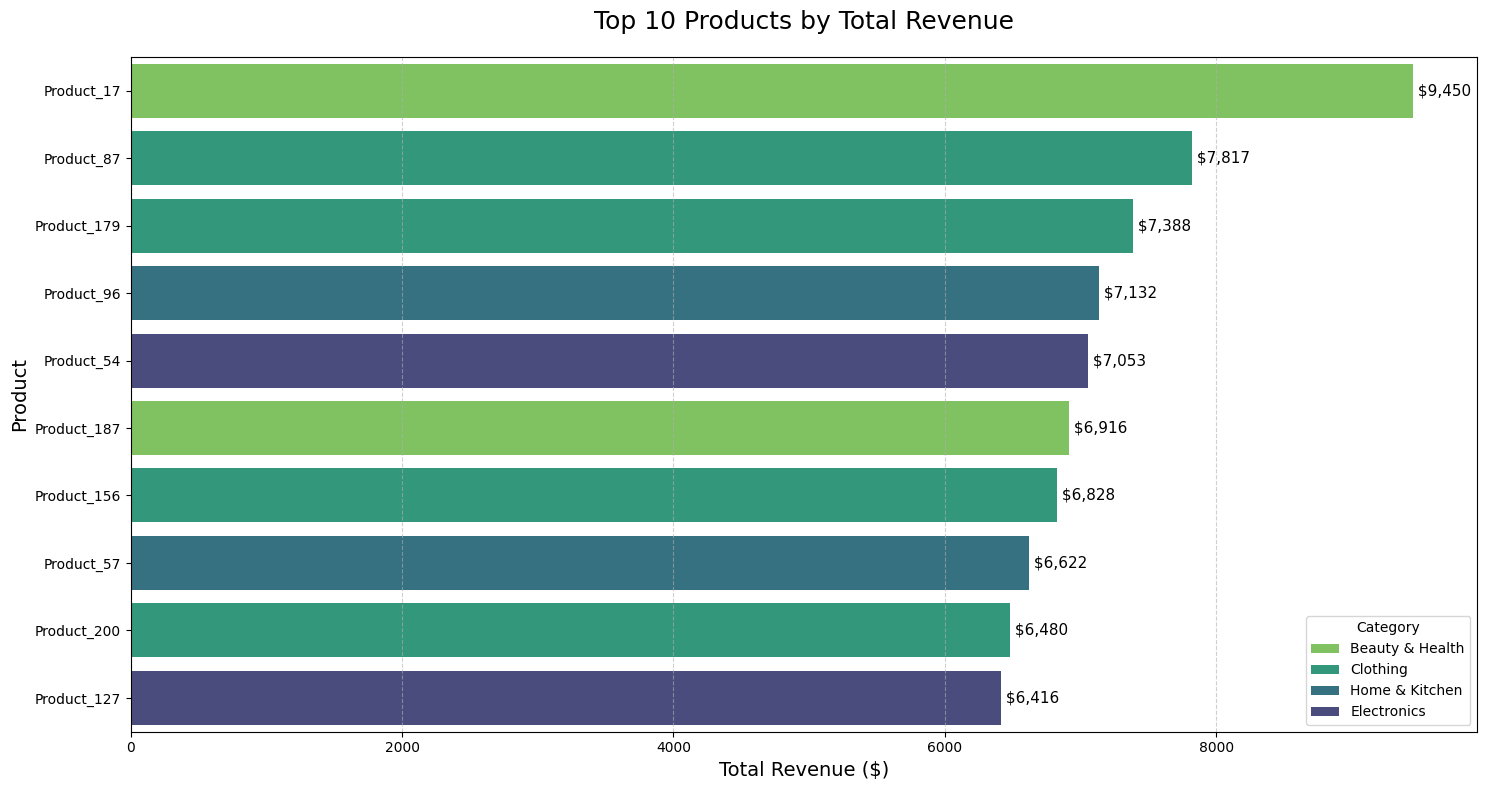

In [28]:
# --- Top 10 Products by Revenue ---
top_n = 10
top_products = revenue_df.head(top_n)
category_revenue = revenue_df.groupby('Category')['TotalRevenue'].sum()
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top_products,
    x='TotalRevenue',
    y='ProductName',
    hue='Category',
    palette='viridis_r'
)
for index, value in enumerate(top_products['TotalRevenue']):
    plt.text(value, index, f' ${value:,.0f}', va='center', fontsize=11)

plt.title(f'Top {top_n} Products by Total Revenue', fontsize=18, pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
revenue_df_category = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  p.Category,
  SUM(s.QuantityPurchased * p.Price) as TotalRevenue
FROM
  sales_cleaned s
JOIN
  Products p
ON
  s.ProductID = p.ProductID

GROUP BY
  p.Category
ORDER BY
  TotalRevenue desc
""", conn)
revenue_df_category

,Category,TotalRevenue
0,Home & Kitchen,217755.94
1,Electronics,177548.48
2,Clothing,162874.21
3,Beauty & Health,143824.99


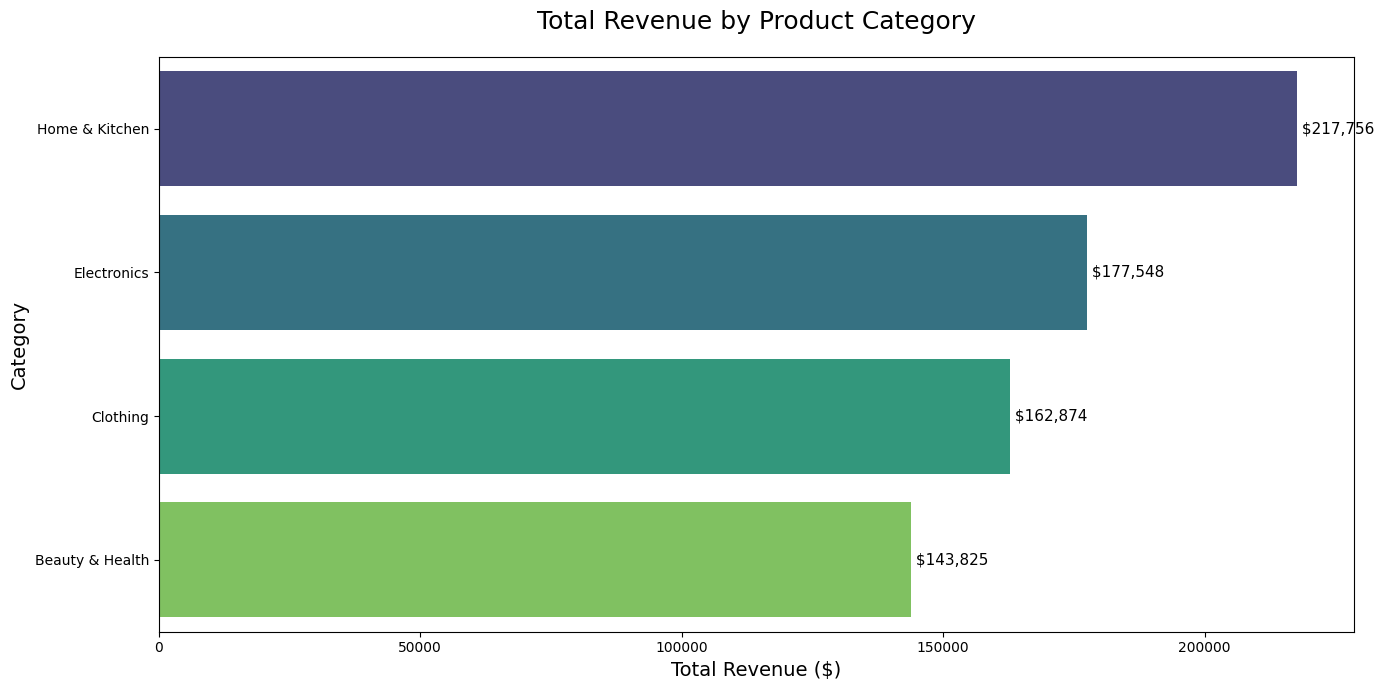

In [30]:
plt.figure(figsize=(14, 7))
sns.barplot(
    data=revenue_df_category,
    x='TotalRevenue',
    y='Category',
    hue='Category',
    legend=False,
    palette='viridis'
)

plt.title('Total Revenue by Product Category', fontsize=18, pad=20)
plt.xlabel('Total Revenue ($)', fontsize=14)
plt.ylabel('Category', fontsize=14)

for index, value in enumerate(revenue_df_category['TotalRevenue']):
    plt.text(value, index, f' ${value:,.0f}', va='center', fontsize=11)

plt.tight_layout()
plt.show()

In [31]:
revenue_share = f"""
{sales_CTE_query},
product_revenue AS (
  SELECT
    p.ProductID,
    p.ProductName,
    p.Category,
    SUM(s.QuantityPurchased * p.Price) AS TotalRevenue
  FROM sales_cleaned s
  JOIN products p ON s.ProductID = p.ProductID
  GROUP BY p.ProductID, p.ProductName, p.Category
)
-- Now, we calculate the percentage share using the result from above
SELECT
  ProductName,
  Category,
  TotalRevenue,
  (TotalRevenue / SUM(TotalRevenue) OVER()) * 100 AS RevenueSharePercentage
FROM product_revenue
ORDER BY TotalRevenue DESC
"""
product_share_df = pd.read_sql(revenue_share, conn)

product_share_df.head(10)

,ProductName,Category,TotalRevenue,RevenueSharePercentage
0,Product_17,Beauty & Health,9450.00,1.346147
1,Product_87,Clothing,7817.24,1.113561
2,Product_179,Clothing,7388.26,1.052453
3,Product_96,Home & Kitchen,7132.32,1.015995
4,Product_54,Electronics,7052.86,1.004676
5,Product_187,Beauty & Health,6915.88,0.985163
6,Product_156,Clothing,6827.84,0.972622
7,Product_57,Home & Kitchen,6622.20,0.943328
8,Product_200,Clothing,6479.79,0.923042
9,Product_127,Electronics,6415.80,0.913927


In [32]:
category_share_q = f"""
{sales_CTE_query},
category_revenue AS (
  SELECT
    p.Category,
    SUM(s.QuantityPurchased * p.Price) AS TotalRevenue
  FROM sales_cleaned s
  JOIN products p ON s.ProductID = p.ProductID
  GROUP BY p.Category
)
SELECT
  Category,
  TotalRevenue,
  (TotalRevenue / SUM(TotalRevenue) OVER()) * 100 AS RevenueSharePercentage
FROM category_revenue
ORDER BY TotalRevenue DESC
"""
category_share_df = pd.read_sql(category_share_q, conn)
category_share_df

,Category,TotalRevenue,RevenueSharePercentage
0,Home & Kitchen,217755.94,31.019205
1,Electronics,177548.48,25.291676
2,Clothing,162874.21,23.201335
3,Beauty & Health,143824.99,20.487785


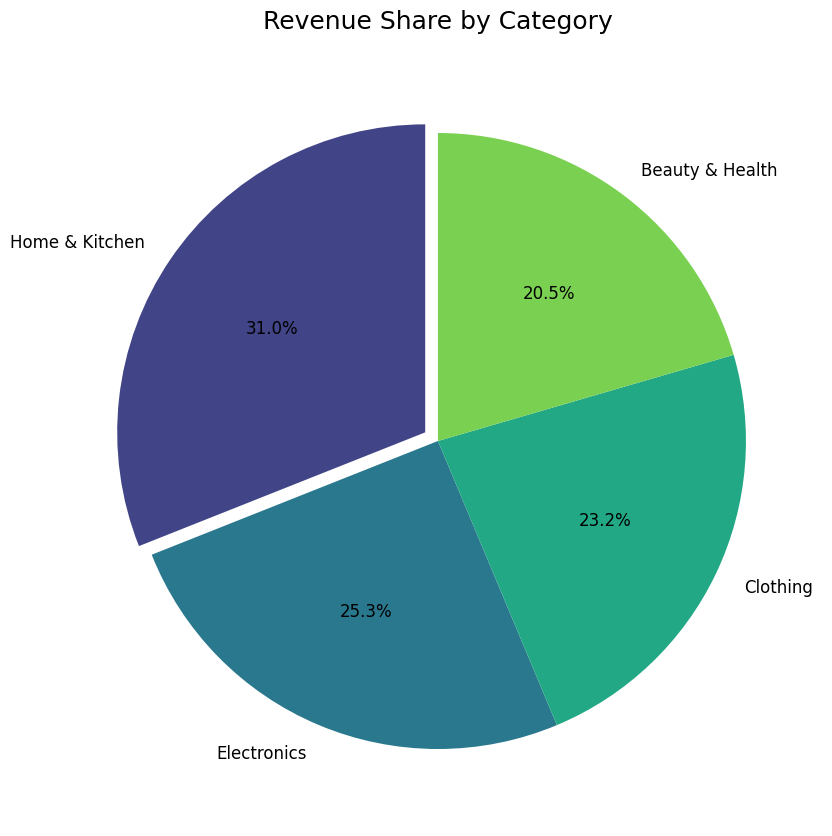

In [33]:

plt.rcParams['figure.figsize'] = (10, 10) # Make the figure a square

explode = [0.05] + [0] * (len(category_share_df) - 1)

plt.pie(
    category_share_df['RevenueSharePercentage'],
    labels=category_share_df['Category'],
    autopct='%1.1f%%',  # Format numbers to one decimal place
    startangle=90,      # Rotate the chart for better aesthetics
    colors=sns.color_palette('viridis', len(category_share_df)),
    explode=explode,
    textprops={'fontsize': 12}
)

plt.title('Revenue Share by Category', fontsize=18, pad=20)
plt.show()

/tmp/ipython-input-66-1892687960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


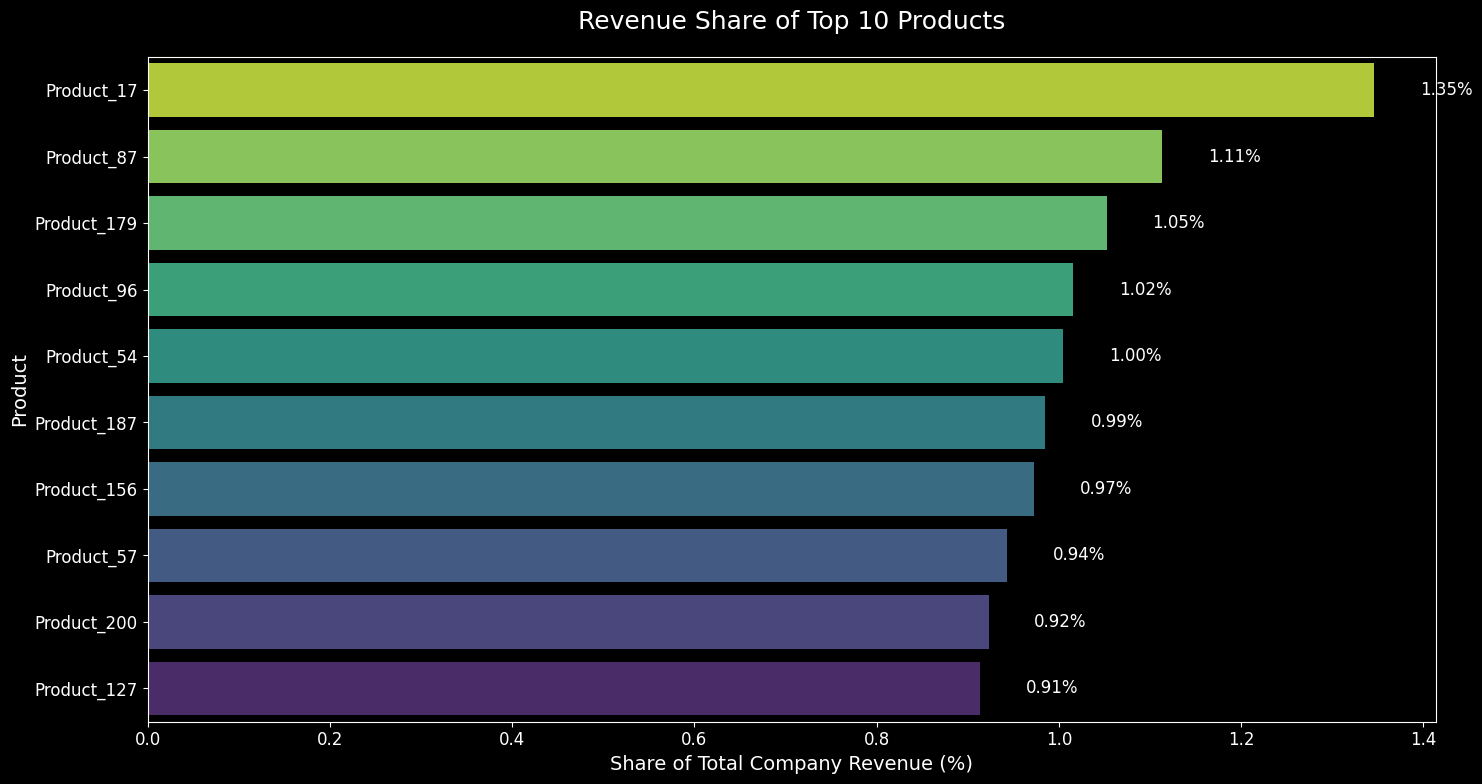

In [66]:

top_10_products_df = product_share_df.head(10)


plt.rcParams['figure.figsize'] = (15, 8)

ax = sns.barplot(
    data=top_10_products_df,
    x='RevenueSharePercentage',
    y='ProductName',
    palette='viridis_r'
)

plt.title('Revenue Share of Top 10 Products', fontsize=18, pad=20)
plt.xlabel('Share of Total Company Revenue (%)', fontsize=14)
plt.ylabel('Product', fontsize=14)

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.05, p.get_y() + p.get_height()/2.,
             f'{width:.2f}%',
             va='center')

plt.tight_layout()
plt.show()

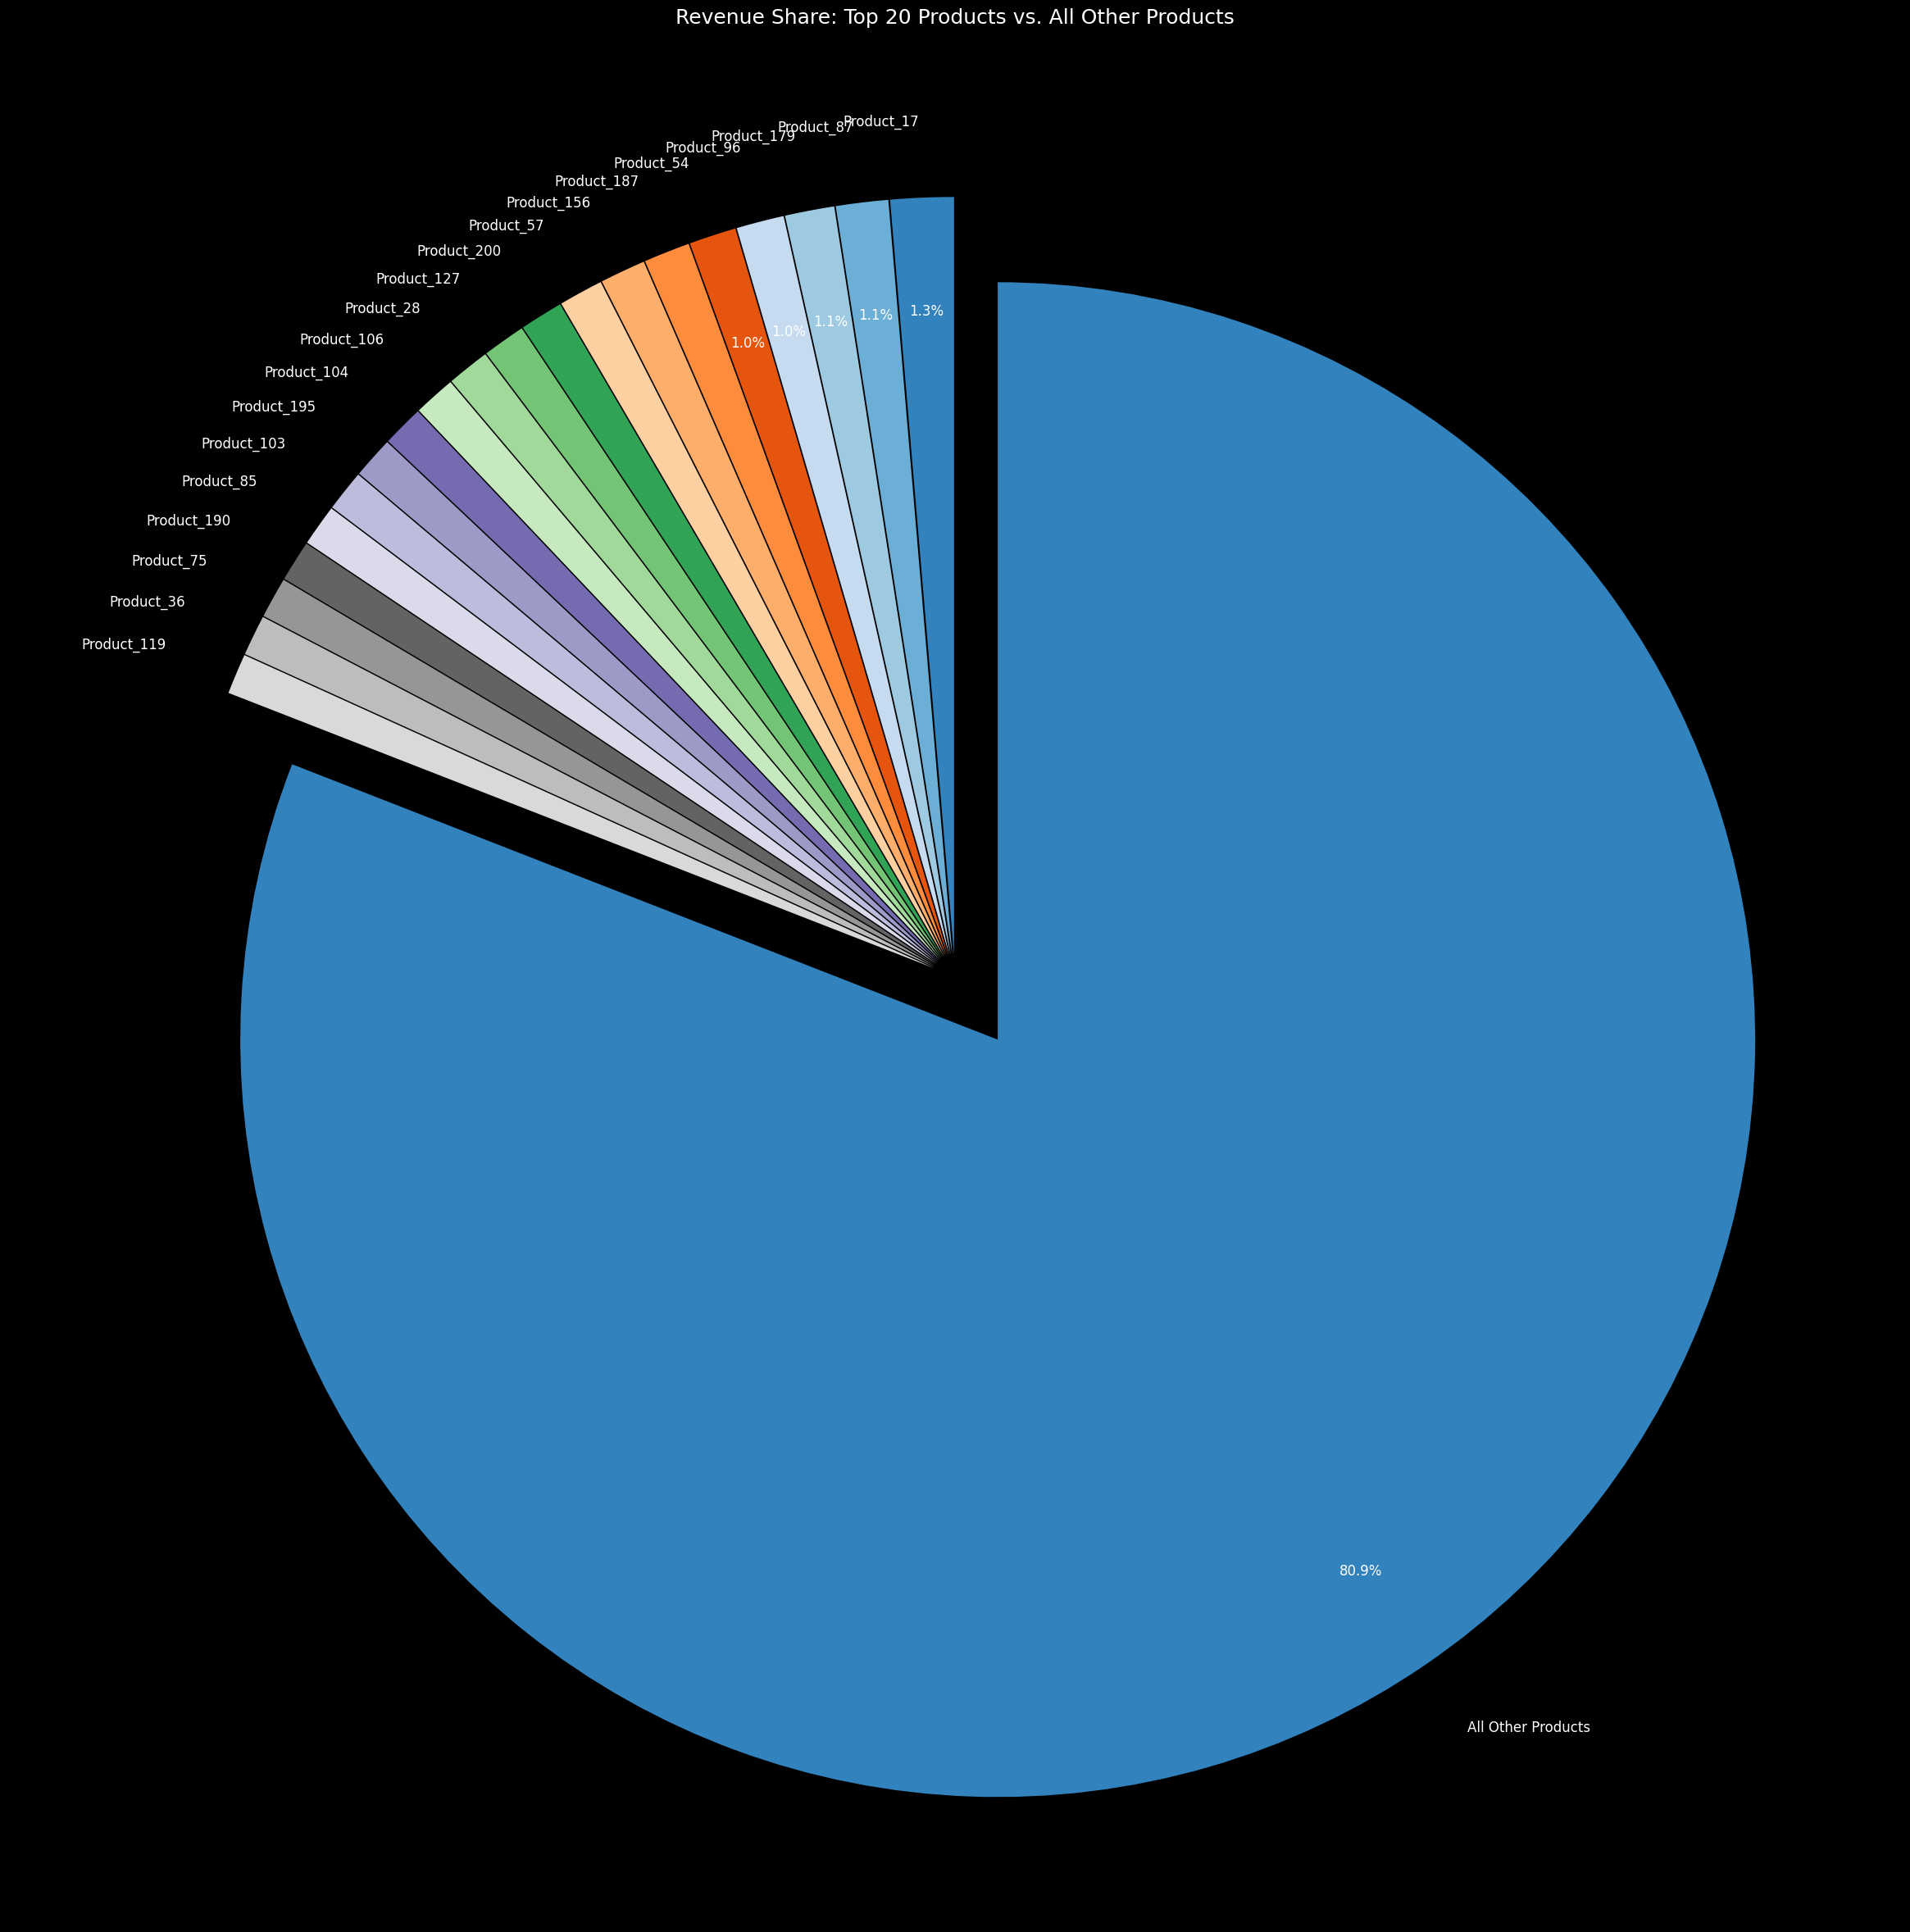

In [65]:
top_n = 20
top_products_for_pie = product_share_df.head(top_n).copy()
other_share = product_share_df.iloc[top_n:]['RevenueSharePercentage'].sum()

other_row = pd.DataFrame([{'ProductName': 'All Other Products', 'RevenueSharePercentage': other_share}])
pie_chart_df = pd.concat([top_products_for_pie, other_row], ignore_index=True)

plt.rcParams['figure.figsize'] = (30, 30)
explode_val = 0.03
explode = [explode_val] * top_n + [0.1] # Make the "Other" slice pop out more

plt.pie(
    pie_chart_df['RevenueSharePercentage'],
    labels=pie_chart_df['ProductName'],
    autopct=lambda p: f'{p:.1f}%' if p > 1 else '',
    startangle=90,
    colors=sns.color_palette('tab20c', len(pie_chart_df)),
    explode=explode,
    pctdistance=0.85
)
plt.title(f'Revenue Share: Top {top_n} Products vs. All Other Products', fontsize=18)
plt.show()

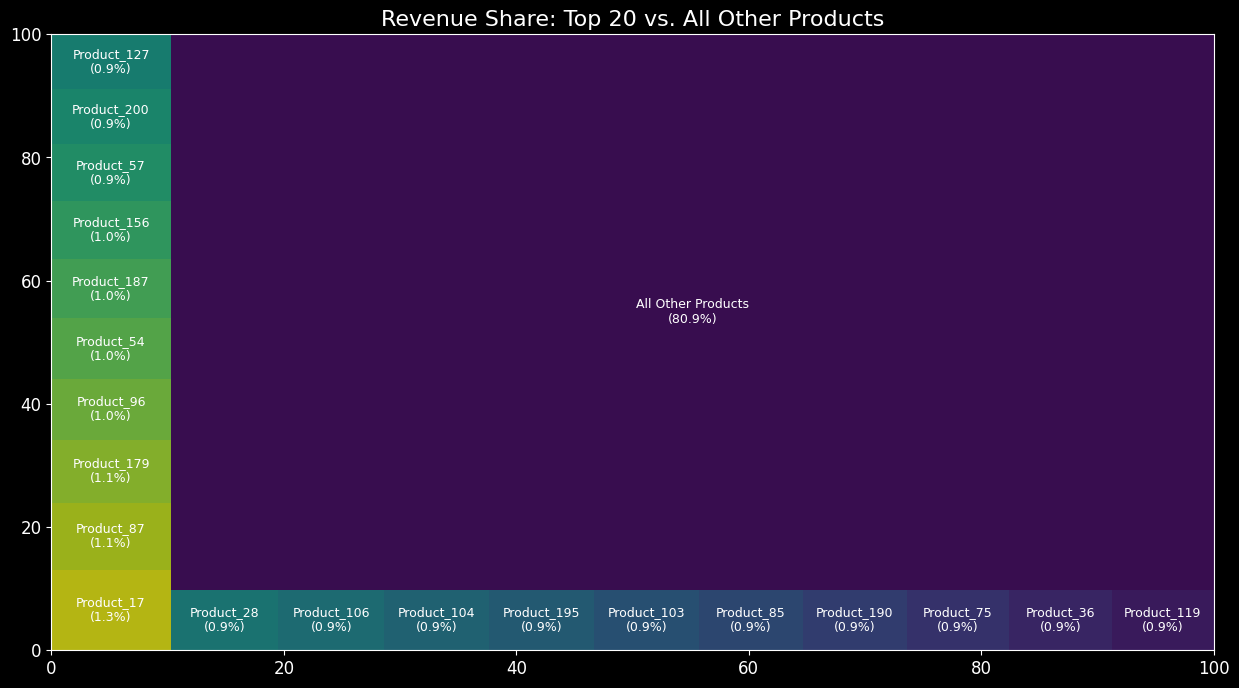

In [68]:

sizes = pie_chart_df['RevenueSharePercentage']
labels = [f"{name}\n({perc:.1f}%)" for name, perc in zip(pie_chart_df['ProductName'], pie_chart_df['RevenueSharePercentage'])]

squarify.plot(
            sizes=sizes,
            label=labels,
            color=sns.color_palette("viridis_r", len(pie_chart_df)),
            alpha=0.8,
            text_kwargs={'fontsize': 9}
)
plt.title(f'Revenue Share: Top {top_n} vs. All Other Products', fontsize=16)
plt.show()

### Insights so far :

1. Category Distribution: There is no single dominant category. The revenue is split remarkably evenly across all four, with each contributing between 20% and 31%. This is a sign of a well-diversified business. It's not overly reliant on one area, which is a significant strength and reduces risk.
2. Product Distribution: The top product, Product_17, accounts for only 1.35% of total revenue. This is a critical insight. It tells us that this company succeeds not because of a few "hero" products, but because it has a very long tail of many different products that customers are buying. The top 20 products combined don't even make up 20% of the revenue. The Pareto Principle (80/20 rule) is not in strong effect here.


> Business Strength Lies in a Broad, Diversified Portfolio (Not Concentration)

* Evidence (Category Level): The four main categories show a healthy revenue split, with Home & Kitchen at 31%, Electronics at 25%, Clothing at 23%, and Beauty & Health at 20%. This diversification is a core strength, mitigating the risk of market shifts in any single category.
* Evidence (Product Level): Contrary to the typical 80/20 rule, the revenue is not concentrated in a handful of "hero" products. The top-selling product accounts for less than 1.5% of total revenue. This indicates that the company's success is driven by a wide variety of products, each contributing a small but important part to the whole.


### Identifying the worst performing products

In [36]:
revenue_df_worst = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  s.ProductID,
  SUM(s.QuantityPurchased * p.Price) as TotalRevenue,
  SUM(s.QuantityPurchased) as TotalQuantitySold,
  p.ProductName,
  p.Category
FROM
  sales_cleaned s
JOIN
  Products p
ON
  s.ProductID = p.ProductID

GROUP BY
  s.ProductID
ORDER BY
  TotalRevenue asc
""", conn)
revenue_df_worst.head(10)

,ProductID,TotalRevenue,TotalQuantitySold,ProductName,Category
0,139,484.10,47,Product_139,Beauty & Health
1,161,547.50,50,Product_161,Clothing
2,159,609.70,35,Product_159,Beauty & Health
3,20,610.74,58,Product_20,Beauty & Health
4,178,616.55,55,Product_178,Clothing
5,66,623.10,62,Product_66,Beauty & Health
6,35,658.92,57,Product_35,Beauty & Health
7,21,700.21,49,Product_21,Home & Kitchen
8,109,733.92,66,Product_109,Home & Kitchen
9,164,756.28,73,Product_164,Clothing


just by itself low sales do not mean the product is low performing. We need to see the stocklevels of these products to ensure that low sales are combined with large number of stockpiles left in the storage -> which will imply the product is overstocked

In [37]:
revenue_df_worst_stockpile = pd.read_sql(f"""
{sales_CTE_query}
SELECT
  s.ProductID,
  SUM(s.QuantityPurchased * p.Price) as TotalRevenue,
  SUM(s.QuantityPurchased) as TotalQuantitySold,
  p.ProductName,
  p.Category,
  p.StockLevel
FROM
  sales_cleaned s
JOIN
  Products p
ON
  s.ProductID = p.ProductID

GROUP BY
  s.ProductID
ORDER BY
  TotalRevenue asc
""", conn)
revenue_df_worst_stockpile.head(10)

,ProductID,TotalRevenue,TotalQuantitySold,ProductName,Category,StockLevel
0,139,484.10,47,Product_139,Beauty & Health,390
1,161,547.50,50,Product_161,Clothing,65
2,159,609.70,35,Product_159,Beauty & Health,232
3,20,610.74,58,Product_20,Beauty & Health,429
4,178,616.55,55,Product_178,Clothing,110
5,66,623.10,62,Product_66,Beauty & Health,110
6,35,658.92,57,Product_35,Beauty & Health,9
7,21,700.21,49,Product_21,Home & Kitchen,481
8,109,733.92,66,Product_109,Home & Kitchen,117
9,164,756.28,73,Product_164,Clothing,254


For low-selling products, there are two main scenarios:

Overstocked & Slow-Moving (High Risk): This is a product with low sales and high inventory. This is our biggest problem. These products are tying up cash, incurring storage costs, and are at risk of becoming obsolete.


Right-Sized Inventory (Low Risk): This is a product with low sales and low inventory. The business is correctly managing its stock for these duds. They aren't a priority problem.

To clearly quantify the risk, we can create a metric - Inventory Cover Ratio = StockLevel / TotalQuantitySold, A high ratio is very bad.
A low ratio is good.


#### suggested approach : let's first define the thresholds for stock levels and quantity sold. we can use quantiles to find that out from our data


In [38]:
pd.read_sql(f"""
{sales_CTE_query},
ProductSales AS (
SELECT
        p.ProductID,
        p.StockLevel,
        SUM(s.QuantityPurchased) AS TotalQuantitySold
    FROM sales_cleaned s
    JOIN products p ON s.ProductID = p.ProductID
    GROUP BY p.ProductID, p.StockLevel)
    SELECT
        StockLevel,
        TotalQuantitySold,
        COUNT(*) OVER () AS TotalProducts,
        ROW_NUMBER() OVER (ORDER BY StockLevel) AS StockRank,
        ROW_NUMBER() OVER (ORDER BY TotalQuantitySold) AS SalesRank
    FROM ProductSales""", conn)

,StockLevel,TotalQuantitySold,TotalProducts,StockRank,SalesRank
0,0,79,200,1,185
1,9,57,200,2,67
2,11,62,200,3,107
3,13,60,200,4,89
4,16,62,200,5,106
...,...,...,...,...,...
195,491,56,200,196,63
196,493,67,200,197,138
197,496,60,200,198,90
198,498,39,200,199,9


In [39]:
quantile_q = f"""
-- This query calculates the quantile-based thresholds for our business rules
{sales_CTE_query},
ProductSales AS (
    SELECT
        p.ProductID,
        p.StockLevel,
        SUM(s.QuantityPurchased) AS TotalQuantitySold
    FROM sales_cleaned s
    JOIN products p ON s.ProductID = p.ProductID
    GROUP BY p.ProductID, p.StockLevel
),
RankedData AS (
    SELECT
        StockLevel,
        TotalQuantitySold,
        COUNT(*) OVER () AS TotalProducts,
        ROW_NUMBER() OVER (ORDER BY StockLevel) AS StockRank,
        ROW_NUMBER() OVER (ORDER BY TotalQuantitySold) AS SalesRank
    FROM ProductSales
)
SELECT
    MAX(CASE WHEN StockRank = CAST(TotalProducts * 0.25 AS INTEGER) THEN StockLevel END) AS Stock_Q1,

    MAX(CASE WHEN StockRank = CAST(TotalProducts * 0.50 AS INTEGER) THEN StockLevel END) AS Stock_Median,

    MAX(CASE WHEN StockRank = CAST(TotalProducts * 0.75 AS INTEGER) THEN StockLevel END) AS Stock_Q3,

    MAX(CASE WHEN SalesRank = CAST(TotalProducts * 0.25 AS INTEGER) THEN TotalQuantitySold END) AS Sales_Q1,

    MAX(CASE WHEN SalesRank = CAST(TotalProducts * 0.50 AS INTEGER) THEN TotalQuantitySold END) AS Sales_Median,

    MAX(CASE WHEN SalesRank = CAST(TotalProducts * 0.75 AS INTEGER) THEN TotalQuantitySold END) AS Sales_Q3

FROM RankedData;
"""

pd.read_sql(quantile_q, conn)


,Stock_Q1,Stock_Median,Stock_Q3,Sales_Q1,Sales_Median,Sales_Q3
0,135,257,384,55,61,69


In [40]:
#Pandas Quantile Calculation
stock_levels_query = "SELECT StockLevel FROM products WHERE StockLevel > 0;"
stock_levels_df = pd.read_sql(stock_levels_query, conn)

sales_quantity_query = f"""
{sales_CTE_query}
SELECT
    p.ProductID,
    SUM(s.QuantityPurchased) AS TotalQuantitySold
FROM
    sales_cleaned s
JOIN
    products p ON s.ProductID = p.ProductID
GROUP BY p.ProductID
HAVING TotalQuantitySold > 0;
"""
sales_quantity_df = pd.read_sql(sales_quantity_query, conn)

pandas_stock_q1 = stock_levels_df['StockLevel'].quantile(0.25)
pandas_stock_q2 = stock_levels_df['StockLevel'].quantile(0.5)
pandas_stock_q3 = stock_levels_df['StockLevel'].quantile(0.75)
pandas_sales_q1 = sales_quantity_df['TotalQuantitySold'].quantile(0.25)
pandas_sales_q2 = sales_quantity_df['TotalQuantitySold'].quantile(0.5)
pandas_sales_q3 = sales_quantity_df['TotalQuantitySold'].quantile(0.75)

print("\n--- Results from Pandas Method ---")
print(f"Stock Level Q1 (25th Percentile): {pandas_stock_q1}")
print(f"Stock Level Q2 (50th Percentile): {pandas_stock_q2}")
print(f"Stock Level Q3 (75th Percentile): {pandas_stock_q3}")

print(f"Sales Quantity Q1 (25th Percentile): {pandas_sales_q1}")
print(f"Sales Quantity Q2 (50th Percentile): {pandas_sales_q2}")
print(f"Sales Quantity Q3 (75th Percentile): {pandas_sales_q3}")


--- Results from Pandas Method ---
Stock Level Q1 (25th Percentile): 139.0
Stock Level Q2 (50th Percentile): 264.0
Stock Level Q3 (75th Percentile): 385.0
Sales Quantity Q1 (25th Percentile): 55.0
Sales Quantity Q2 (50th Percentile): 61.0
Sales Quantity Q3 (75th Percentile): 69.25


**based on the above analysis, we will define our stocklevel and sale thresholds to judge product performance**
So a product will be deigned to be high-risk/overstocked if it meets the following criteria:

TotalQuantitySold < 55 (The bottom 25% of sellers)

StockLevel > 385 (The top 25% by inventory)

In [41]:
at_risk_products_q = f"""
-- Final query with validated, data-driven business logic
{sales_CTE_query},
product_sales_inventory AS (
    SELECT
        p.ProductID,
        p.ProductName,
        p.Category,
        p.StockLevel,
        SUM(s.QuantityPurchased) AS TotalQuantitySold
    FROM
        sales_cleaned s
    JOIN
        products p ON s.ProductID = p.ProductID
    GROUP BY
        p.ProductID, p.ProductName, p.Category, p.StockLevel
)
SELECT
    ProductName,
    Category,
    TotalQuantitySold,
    StockLevel,
    -- Calculated Field 1: Inventory Cover Ratio
    CASE
        WHEN TotalQuantitySold > 0 THEN ROUND(StockLevel * 1.0 / TotalQuantitySold, 2)
        ELSE 9999 -- Assigning a very high number for non-sellers
    END AS InventoryCoverRatio,
    -- Calculated Field 2: Risk Label
    CASE
        WHEN TotalQuantitySold < 55 AND StockLevel > 385 THEN 'High Risk - Overstocked'
        ELSE 'Normal'
    END AS RiskLabel
FROM
    product_sales_inventory
ORDER BY
    RiskLabel ASC
"""
product_risk_df = pd.read_sql(at_risk_products_q, conn)
product_risk_df.head(20)

,ProductName,Category,TotalQuantitySold,StockLevel,InventoryCoverRatio,RiskLabel
0,Product_3,Home & Kitchen,48,473,9.85,High Risk - Overstocked
1,Product_6,Home & Kitchen,51,449,8.80,High Risk - Overstocked
2,Product_14,Electronics,51,421,8.25,High Risk - Overstocked
3,Product_21,Home & Kitchen,49,481,9.82,High Risk - Overstocked
4,Product_121,Beauty & Health,46,428,9.30,High Risk - Overstocked
5,Product_124,Clothing,39,498,12.77,High Risk - Overstocked
6,Product_139,Beauty & Health,47,390,8.30,High Risk - Overstocked
7,Product_158,Beauty & Health,47,441,9.38,High Risk - Overstocked
8,Product_160,Beauty & Health,51,464,9.10,High Risk - Overstocked
9,Product_163,Clothing,39,422,10.82,High Risk - Overstocked


### however this reveals a problem : we have only considered absolute thresholds and not utilised the inventory cover ratio effectively

There may be cases where the sales are low and the stock levels high but not high enough to trigger our alarms. need to modify this further.

In [42]:
quantile_q_v2 = f"""
-- This single query calculates ALL our data-driven thresholds
{sales_CTE_query},
ProductSales AS (
    -- Step 1: Get base sales and inventory figures
    SELECT
        p.ProductID,
        p.StockLevel,
        SUM(s.QuantityPurchased) AS TotalQuantitySold
    FROM sales_cleaned s
    JOIN products p ON s.ProductID = p.ProductID
    GROUP BY p.ProductID, p.StockLevel
),
ProductKPIs AS (
    -- Step 2: Calculate the Inventory Cover Ratio, only for products that sold
    SELECT
        *,
        (StockLevel * 1.0 / TotalQuantitySold) AS InventoryCoverRatio
    FROM ProductSales
    WHERE TotalQuantitySold > 0 -- Critical: Ratios only make sense for items that sold
),
RankedData AS (

    SELECT
        StockLevel,
        TotalQuantitySold,
        InventoryCoverRatio,
        -- We need two different counts now
        (SELECT COUNT(*) FROM ProductSales) AS TotalProducts, -- Total products in catalog
        (SELECT COUNT(*) FROM ProductKPIs) AS TotalProductsSold, -- Total products that sold at least one
        ROW_NUMBER() OVER (ORDER BY StockLevel) AS StockRank,
        ROW_NUMBER() OVER (ORDER BY TotalQuantitySold) AS SalesRank,
        ROW_NUMBER() OVER (ORDER BY InventoryCoverRatio) AS RatioRank -- Our new rank
    FROM ProductKPIs
)
-- Step 4: Pick out the values at the desired quantile ranks
SELECT
    -- Thresholds for the Quadrant Rule
    (SELECT StockLevel FROM RankedData WHERE StockRank = CAST(TotalProducts * 0.75 AS INTEGER)) AS Stock_Q3,
    (SELECT TotalQuantitySold FROM RankedData WHERE SalesRank = CAST(TotalProductsSold * 0.25 AS INTEGER)) AS Sales_Q1,
    -- Threshold for our new Ratio Rule
    (SELECT InventoryCoverRatio FROM RankedData WHERE RatioRank = CAST(TotalProductsSold * 0.90 AS INTEGER)) AS Ratio_P90
FROM RankedData
LIMIT 1; -- Ensure we only get one row of results
"""

quantile_results = pd.read_sql(quantile_q_v2, conn)

print(f"Stock Q3 is {quantile_results['Stock_Q3'][0]}")
print(f"Sales Q1 is {quantile_results['Sales_Q1'][0]}")
print(f"Ratio P90 is {quantile_results['Ratio_P90'][0]}")


Stock Q3 is 384
Sales Q1 is 55
Ratio P90 is 7.587301587301587


In [43]:
at_risk_products_q_v2 = f"""
{sales_CTE_query},
product_sales_inventory AS (
    -- Step 1: Get base sales and inventory figures
    SELECT
        p.ProductID, p.ProductName, p.Category, p.StockLevel,
        SUM(s.QuantityPurchased) AS TotalQuantitySold
    FROM sales_cleaned s
    JOIN products p ON s.ProductID = p.ProductID
    GROUP BY p.ProductID, p.ProductName, p.Category, p.StockLevel
),
product_icr AS (
    SELECT
        *,
        CASE
            WHEN TotalQuantitySold > 0 THEN ROUND(StockLevel * 1.0 / TotalQuantitySold, 2)
            ELSE 9999
        END AS InventoryCoverRatio
    FROM product_sales_inventory
)
SELECT
    ProductName,
    Category,
    TotalQuantitySold,
    StockLevel,
    InventoryCoverRatio,
    CASE
        WHEN (TotalQuantitySold < {quantile_results['Sales_Q1'][0]} AND StockLevel > {quantile_results['Stock_Q3'][0]})
        OR (InventoryCoverRatio > {quantile_results['Ratio_P90'][0]})
        THEN 'High Risk - Overstocked'
        ELSE 'Normal'
    END AS RiskLabel
FROM product_icr
ORDER BY
    InventoryCoverRatio DESC;
"""

product_risk_df = pd.read_sql(at_risk_products_q_v2, conn)
product_risk_df.head(25)

,ProductName,Category,TotalQuantitySold,StockLevel,InventoryCoverRatio,RiskLabel
0,Product_124,Clothing,39,498,12.77,High Risk - Overstocked
1,Product_163,Clothing,39,422,10.82,High Risk - Overstocked
2,Product_3,Home & Kitchen,48,473,9.85,High Risk - Overstocked
3,Product_21,Home & Kitchen,49,481,9.82,High Risk - Overstocked
4,Product_158,Beauty & Health,47,441,9.38,High Risk - Overstocked
5,Product_121,Beauty & Health,46,428,9.30,High Risk - Overstocked
6,Product_160,Beauty & Health,51,464,9.10,High Risk - Overstocked
7,Product_196,Home & Kitchen,55,490,8.91,High Risk - Overstocked
8,Product_6,Home & Kitchen,51,449,8.80,High Risk - Overstocked
9,Product_157,Beauty & Health,56,491,8.77,High Risk - Overstocked


/tmp/ipython-input-44-3812238826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


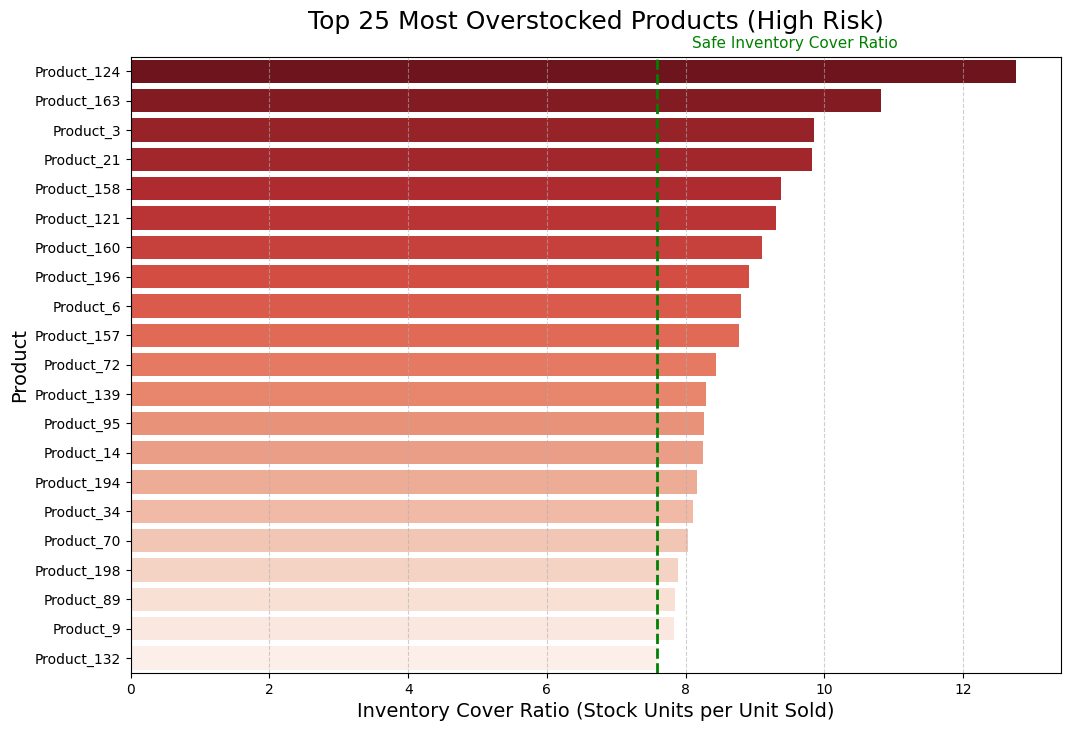

In [44]:
high_risk_products = product_risk_df[product_risk_df['RiskLabel'] == 'High Risk - Overstocked']

top_n_risk = high_risk_products.sort_values('InventoryCoverRatio', ascending=False).head(25)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_n_risk,
    x='InventoryCoverRatio',
    y='ProductName',
    palette='Reds_r'
)
safe_ratio_threshold = quantile_results['Ratio_P90'][0]
plt.axvline(x=safe_ratio_threshold, color='green', linestyle='--', linewidth=2, label=f'"Normal" Ratio Threshold ({safe_ratio_threshold})')
plt.text(safe_ratio_threshold + 0.5, -0.8, 'Safe Inventory Cover Ratio',
         color='green', fontsize=11)

plt.title('Top 25 Most Overstocked Products (High Risk)', fontsize=18, pad=20)
plt.xlabel('Inventory Cover Ratio (Stock Units per Unit Sold)', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

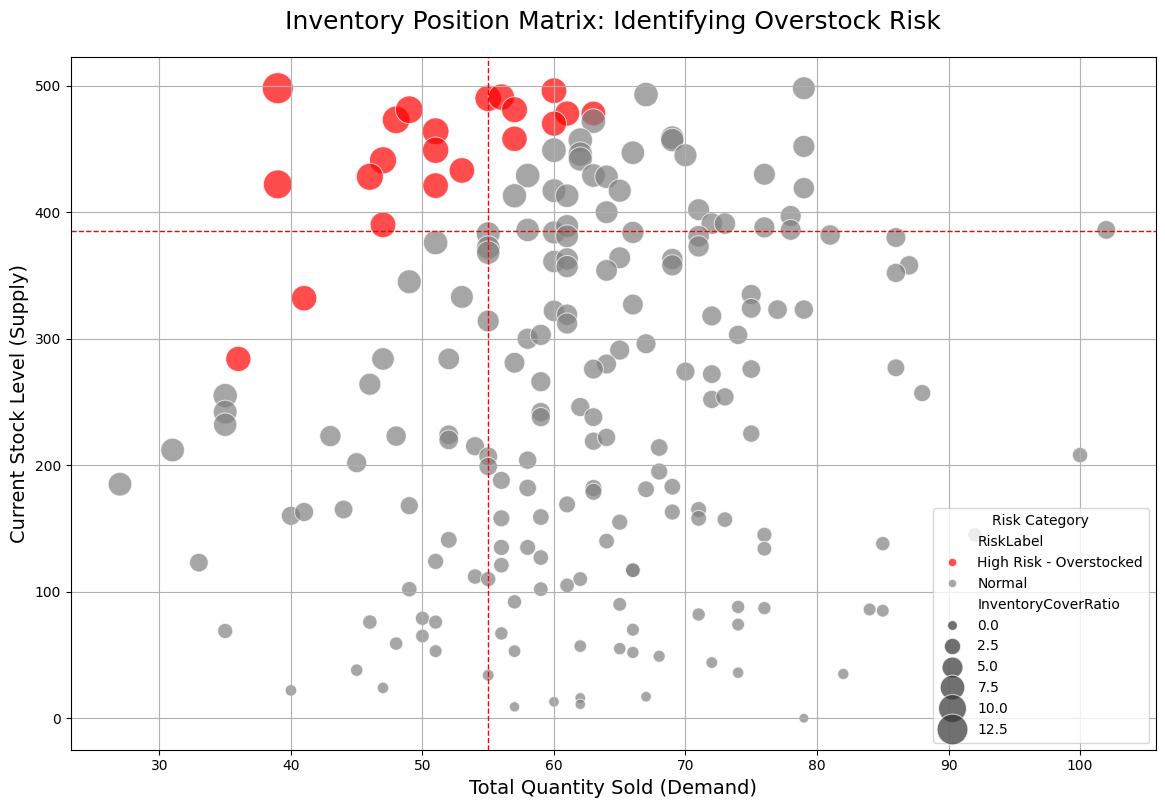

In [45]:
#plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 9))

sns.scatterplot(
    data=product_risk_df,
    x='TotalQuantitySold',
    y='StockLevel',
    # Use the new RiskLabel for coloring!
    hue='RiskLabel',
    palette={'High Risk - Overstocked': 'red', 'Normal': 'grey'},
    size='InventoryCoverRatio',
    sizes=(50, 500),
    alpha=0.7
)

# Use our validated thresholds to draw the quadrant lines
plt.axhline(y=385, color='red', linestyle='--', lw=1)
plt.axvline(x=55, color='red', linestyle='--', lw=1)

plt.title('Inventory Position Matrix: Identifying Overstock Risk', fontsize=18, pad=20)
plt.xlabel('Total Quantity Sold (Demand)', fontsize=14)
plt.ylabel('Current Stock Level (Supply)', fontsize=14)
plt.legend(title='Risk Category')
plt.grid(True)
plt.show()

### Insights so far :

> Capital and Profitability are Being Lost Due to Overstocked, Slow-Moving Inventory.

* Evidence: Our Inventory Position Matrix clearly identifies a segment of products with high stock levels relative to their low sales demand. We flagged products as 'High Risk - Overstocked' if they fell into the bottom 25% of sellers and top 25% of stock levels, OR if their InventoryCoverRatio (a measure of stock vs. sales) was in the top 10% of all products.

* Quantifiable Impact: The "Top 25 Most Overstocked Products" bar chart reveals items with an InventoryCoverRatio exceeding 10x or even higher, compared to a "normal" high-risk threshold of ~7.5. This means for every one unit we sell of these products, we have dozens sitting idle in the warehouse.

* Business Implication: This directly impacts profitability and growth.
* Trapped Cash Flow: Capital that could be used to restock popular items or fund marketing campaigns is tied up in products that do not sell.
* Increased Costs: These items incur ongoing storage and potential obsolescence costs, directly eating into profit margins.

> Actionable Recommendations

Based on these insights, we recommend the following immediate actions:
* Launch a Targeted Clearance Campaign for the top 25 products identified as 'High Risk' - by offering clearance sales etc
* Implement a Smart Bundling Strategy: Pair slow-moving, overstocked products as a free gift or a heavily discounted add-on with high-selling "star" products from our initial analysis. This leverages the popularity of good products to solve the problem of bad ones.
* Establish a Quarterly Inventory Review Process: Use the SQL query we built as a recurring report to proactively identify 'High Risk' products. Any product that remains in this category for two consecutive quarters should be flagged for potential discontinuation from the catalog.

### Sales Trends Analysis

Total Revenue for each month

In [46]:
pd.read_sql(f"""
{sales_CTE_query}
SELECT
  *
FROM
  sales_cleaned
LIMIT 5
""", conn)

,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
0,2761,1,2,4,26/04/23,81.60
1,4935,1,7,3,25/07/23,58.20
2,1358,1,19,2,26/02/23,96.33
3,1586,1,32,3,08/03/23,43.82
4,4512,1,41,4,07/07/23,27.03


In [47]:
monthly_revenue_q = f"""
{sales_CTE_query}
SELECT
  STRFTIME('%Y-%m', '20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)) AS SalesMonth,
  SUM(s.QuantityPurchased * p.Price) as MonthlyTotalRevenue
FROM
  sales_cleaned s
JOIN
  products p
ON
  s.ProductID = p.ProductID
GROUP BY
  SalesMonth
ORDER BY
  SalesMonth
"""
monthly_revenue_df = pd.read_sql(monthly_revenue_q, conn)
monthly_revenue_df

,SalesMonth,MonthlyTotalRevenue
0,2023-01,104289.18
1,2023-02,96690.99
2,2023-03,103271.49
3,2023-04,101561.09
4,2023-05,102998.84
5,2023-06,102210.28
6,2023-07,90981.75


In [48]:
revenue_growth_q = f"""
{sales_CTE_query},
monthly_revenue AS (
  SELECT
    STRFTIME('%Y-%m', '20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)) AS SalesMonth,
    SUM(s.QuantityPurchased * p.Price) as MonthlyTotalRevenue
  FROM sales_cleaned s
  JOIN products p ON s.ProductID = p.ProductID
  GROUP BY SalesMonth
  ORDER BY SalesMonth
),
revenue_with_previous AS (
  SELECT
    SalesMonth,
    MonthlyTotalRevenue,
    LAG(MonthlyTotalRevenue, 1, 0) OVER (ORDER BY SalesMonth) AS PreviousMonthRevenue
  FROM monthly_revenue
)
SELECT
  SalesMonth,
  MonthlyTotalRevenue,
  PreviousMonthRevenue,
  CASE
    WHEN PreviousMonthRevenue = 0 THEN NULL
    ELSE ROUND(((MonthlyTotalRevenue - PreviousMonthRevenue) / PreviousMonthRevenue) * 100, 2)
  END AS RevenueGrowthRate
FROM
  revenue_with_previous;
"""

monthly_revenue_df = pd.read_sql(revenue_growth_q, conn)
monthly_revenue_df

,SalesMonth,MonthlyTotalRevenue,PreviousMonthRevenue,RevenueGrowthRate
0,2023-01,104289.18,0.00,NaN
1,2023-02,96690.99,104289.18,-7.29
2,2023-03,103271.49,96690.99,6.81
3,2023-04,101561.09,103271.49,-1.66
4,2023-05,102998.84,101561.09,1.42
5,2023-06,102210.28,102998.84,-0.77
6,2023-07,90981.75,102210.28,-10.99


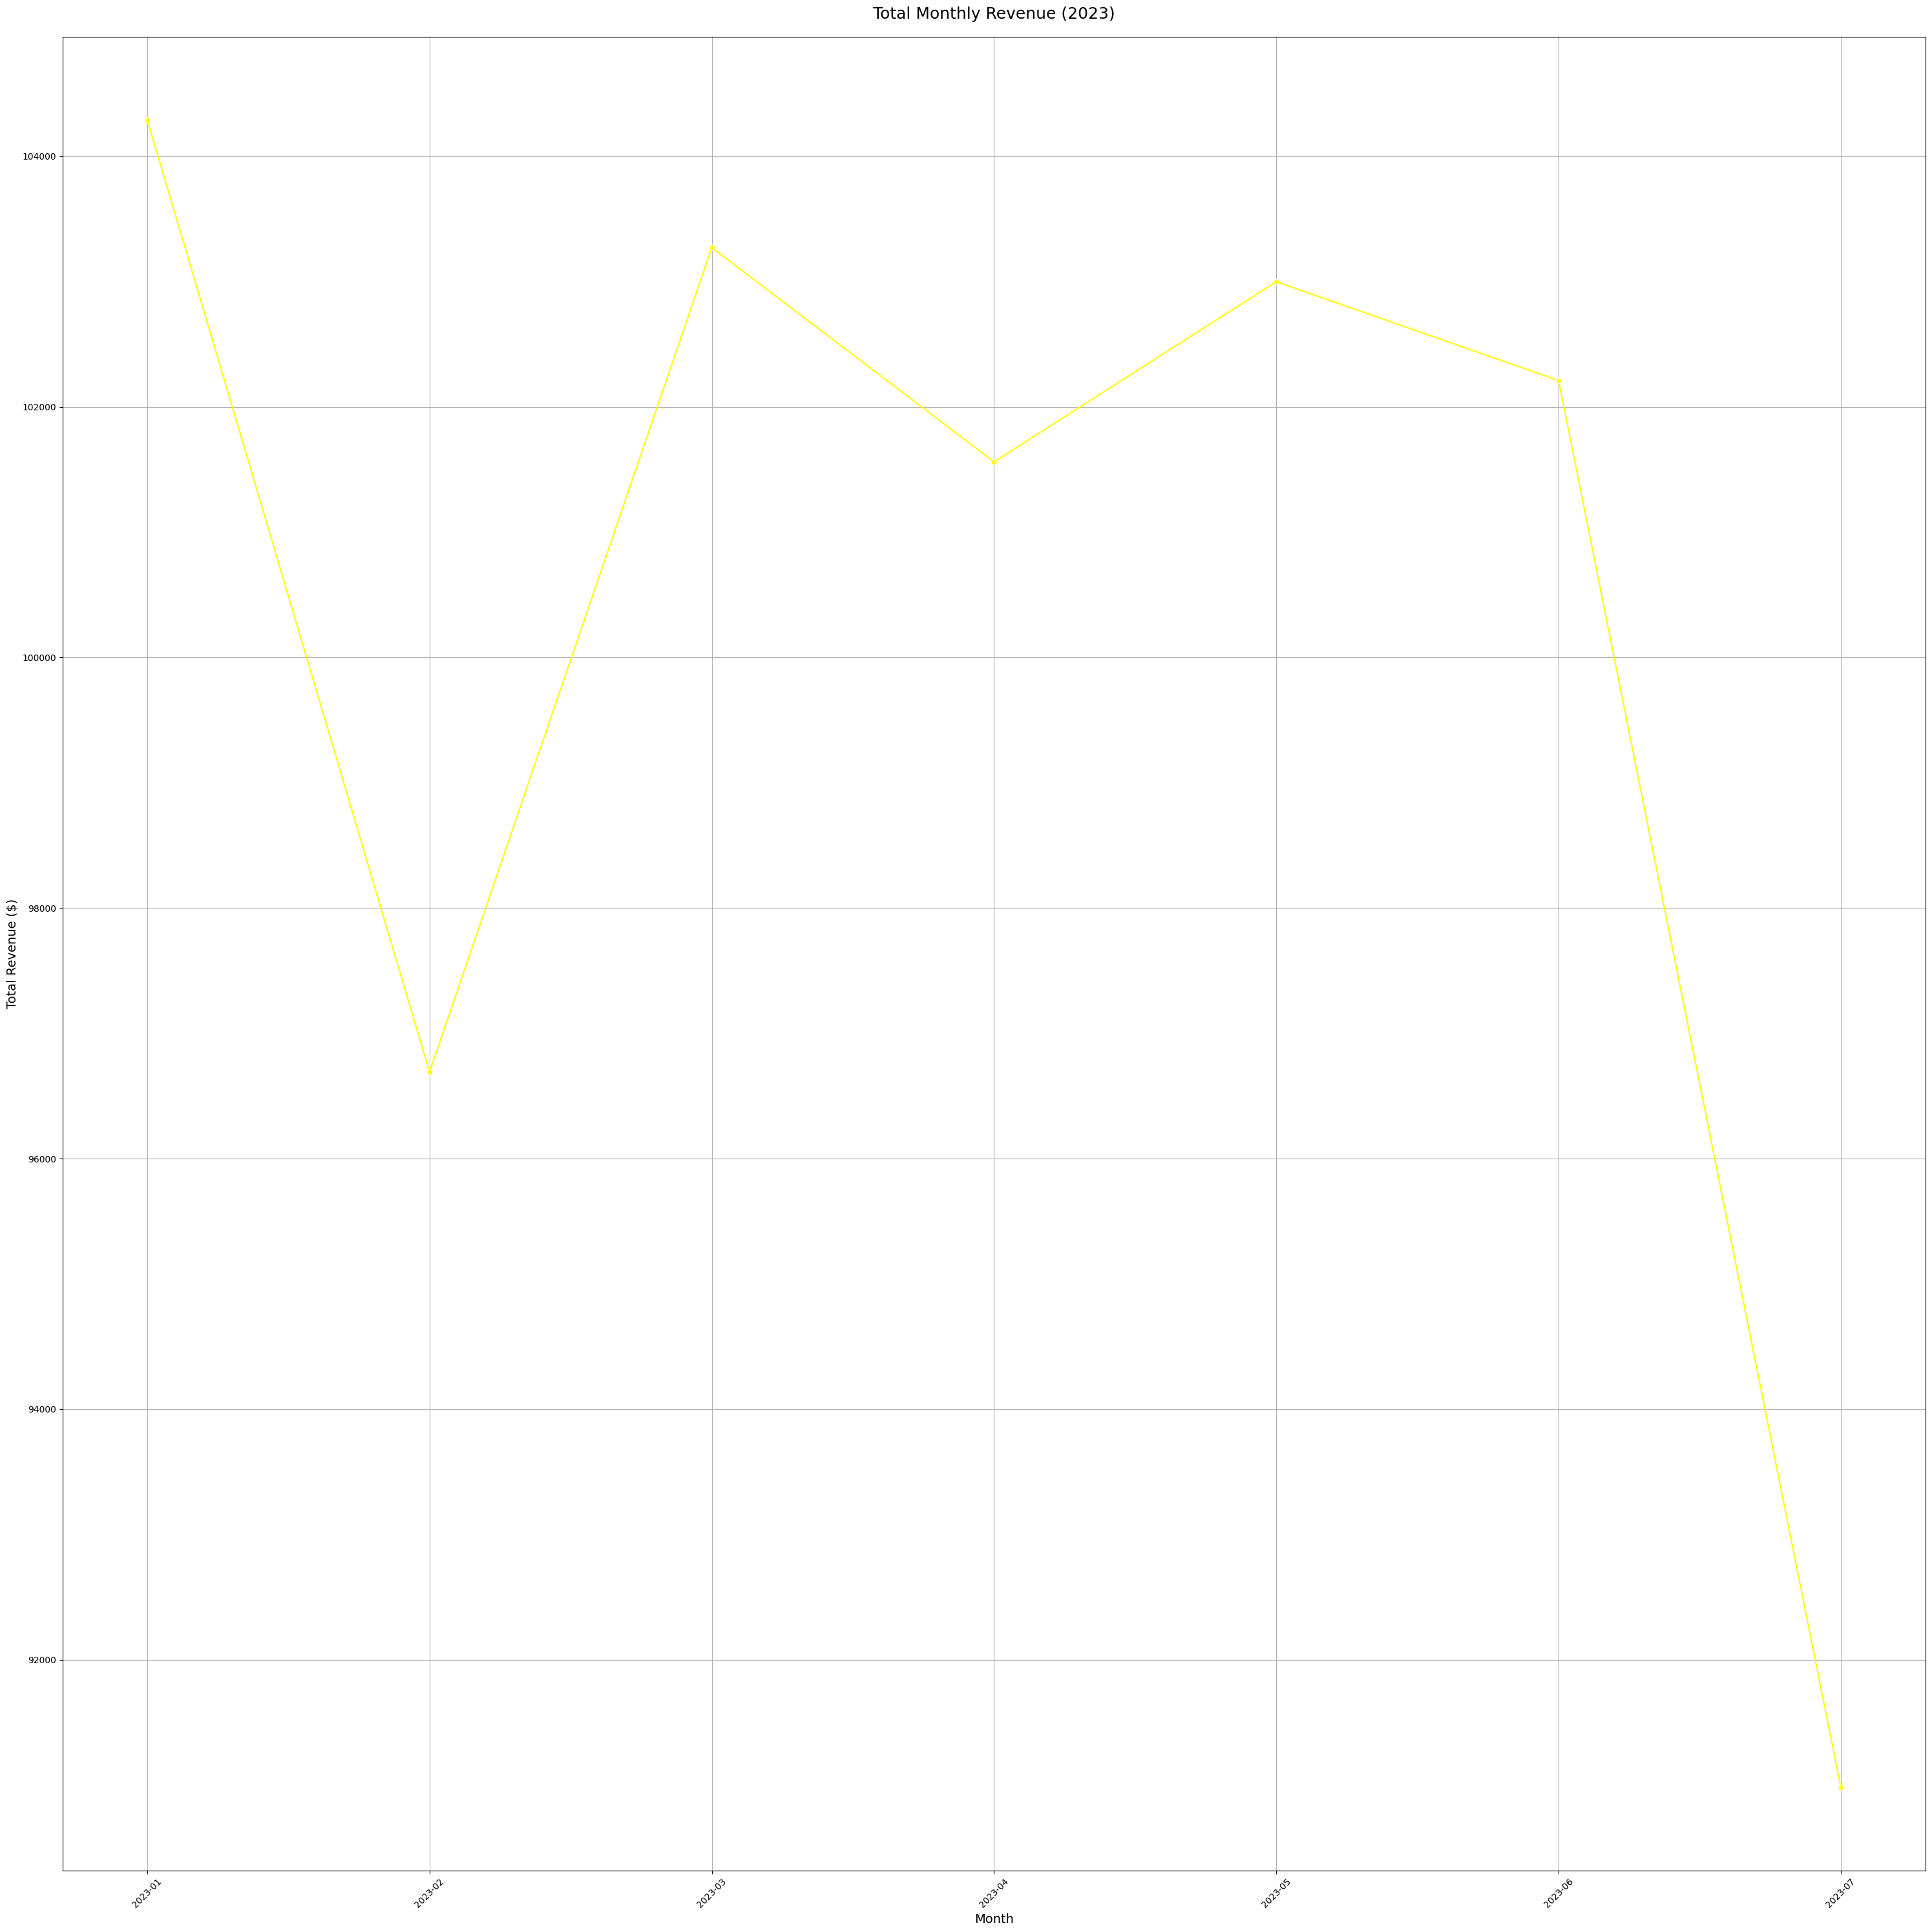

In [49]:
sns.lineplot(
    data=monthly_revenue_df,
    x='SalesMonth',
    y='MonthlyTotalRevenue',
    marker='o',
    linestyle='-',
    color='yellow'
)

plt.title('Total Monthly Revenue (2023)', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-50-3173908922.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


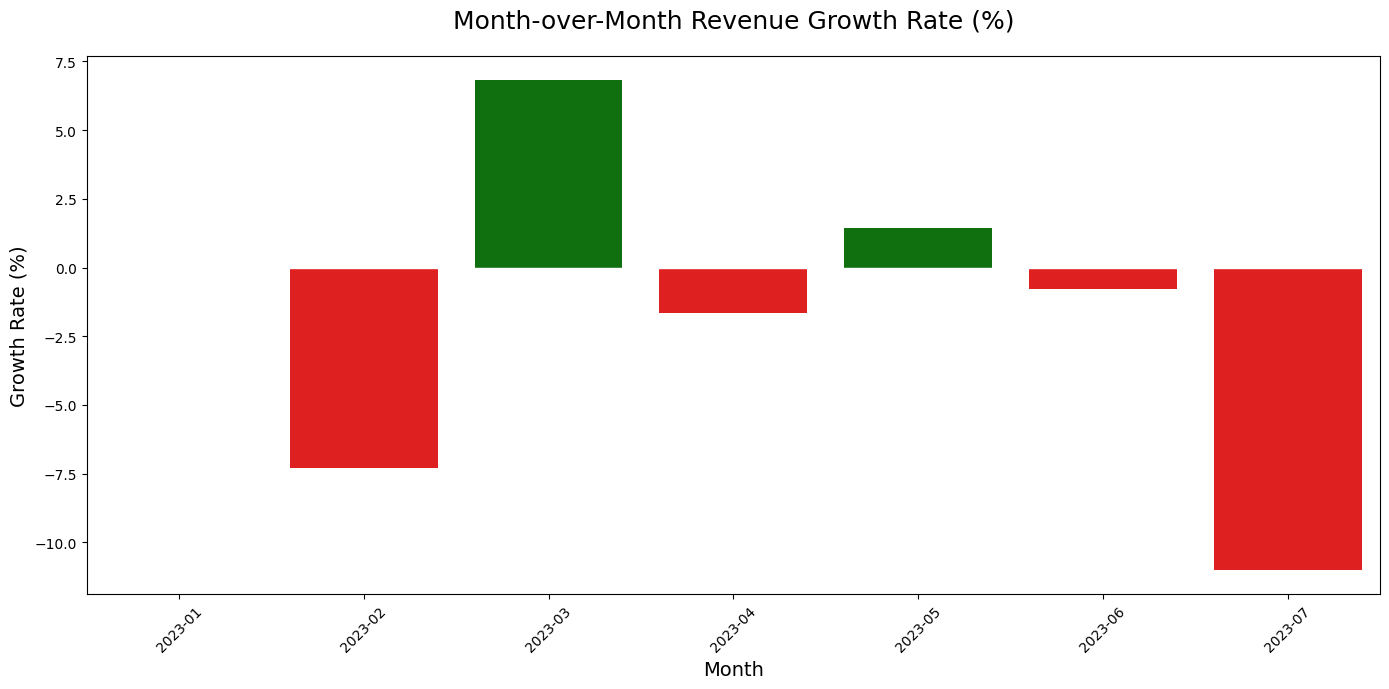

In [50]:

colors = ['green' if x > 0 else 'red' for x in monthly_revenue_df['RevenueGrowthRate']]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=monthly_revenue_df,
    x='SalesMonth',
    y='RevenueGrowthRate',
    palette=colors
)

plt.axhline(y=0, color='white', linewidth=1)

plt.title('Month-over-Month Revenue Growth Rate (%)', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights so far : Sales Trends

**Sales Performance Shows High Volatility with No Clear Upward Trend.**

**Evidence**: The Month-over-Month Growth Rate chart reveals a volatile pattern. While some months show strong growth (e.g., March), they are often preceded or followed by significant declines (e.g., February and July). The business experienced a -7% contraction in February and a steep -11% drop in July.

**Business Implication:**  The business is not on a consistent growth trajectory. The growth is not just stagnant, it is fleeting in some cases. This volatility makes financial forecasting difficult and suggests that positive performance is not being sustained. The large drop in July is a major concern and warrants a deeper investigation into potential causes (e.g., a failed marketing campaign, stockouts of key products, external market factors).

# EDA : Customer Behaviour and Segmentation

## Customer Segmentation based on Value Analysis

In [51]:
pd.read_sql(f"""
{customers_CTE_query}
SELECT * FROM customers_cleaned LIMIT 5
""",conn)

,CustomerID,Age,Gender,Location,JoinDate
0,1,63,Other,East,01/01/20
1,2,63,Male,North,02/01/20
2,3,34,Other,North,03/01/20
3,4,19,Other,Unknown,04/01/20
4,5,57,Male,North,05/01/20


In [52]:
customers_sales_CTE_query = f"""
{sales_CTE_query},
customers_cleaned AS (
SELECT
  CustomerID,
  Age,
  Gender,
  COALESCE(Location, 'Unknown') AS Location,
  JoinDate
FROM
  Customers
)
"""

In [53]:
customer_totalspend_q = f"""
{customers_sales_CTE_query}
SELECT
  c.CustomerID,
  c.Age,
  c.Gender,
  c.Location,
  c.JoinDate,
  SUM(s.QuantityPurchased * p.Price) AS TotalSpend,
  COUNT(DISTINCT s.TransactionID) AS TotalTransactions
FROM
  customers_cleaned c
LEFT JOIN
  sales_cleaned s ON c.CustomerID = s.CustomerID
LEFT JOIN
  products p ON s.ProductID = p.ProductID
GROUP BY
  c.CustomerID, c.Age, c.Gender, c.Location, c.JoinDate
ORDER BY
  TotalSpend DESC
"""
customer_totalspend_df = pd.read_sql(customer_totalspend_q, conn)
customer_totalspend_df.head()

,CustomerID,Age,Gender,Location,JoinDate,TotalSpend,TotalTransactions
0,936,65,Male,East,22/10/22,2834.47,12
1,664,33,Other,South,28/12/21,2519.04,14
2,670,45,Other,East,03/01/22,2432.15,12
3,39,20,Male,West,11/02/20,2221.29,12
4,435,61,Male,North,21/04/21,2158.98,10


We can now create value based segmentation of customers based on their spending

In [54]:
df = customer_totalspend_df.copy()

we want to take a look at the distribution of totalspend values across customers

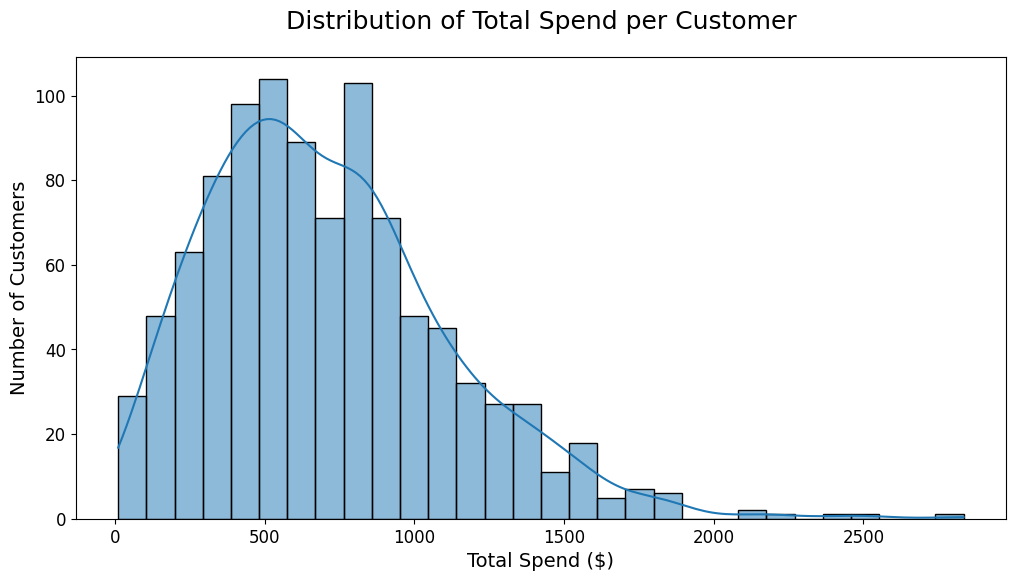

--- Descriptive Statistics for Total Spend ---


,CustomerCount,MinSpend,AvgSpend,MaxSpend,Median,P75_Threshold,P90_Threshold,P95_Threshold,P99_Threshold
0,989,10.95,709.811547,2834.47,650.44,934.87,1254.08,1428.51,1827.24


In [55]:

customer_spend_query = f"""
{sales_CTE_query} -- This should be your sales_cleaned CTE definition
SELECT
  c.CustomerID,
  SUM(s.QuantityPurchased * p.Price) AS TotalSpend
FROM
  customers c
JOIN
  sales_cleaned s ON c.CustomerID = s.CustomerID
JOIN
  products p ON s.ProductID = p.ProductID
GROUP BY
  c.CustomerID
HAVING
  TotalSpend > 0
"""
customer_total_spend_CTE = f"""
{sales_CTE_query},
CustomerSpend AS
(SELECT
  c.CustomerID,
  SUM(s.QuantityPurchased * p.Price) AS TotalSpend
FROM
  customers c
JOIN
  sales_cleaned s ON c.CustomerID = s.CustomerID
JOIN
  products p ON s.ProductID = p.ProductID
GROUP BY
  c.CustomerID
HAVING
  TotalSpend > 0)
"""
customer_spend_df = pd.read_sql(customer_spend_query, conn)


# # --- Plot the Histogram ---
# plt.style.use('seaborn-v0_8-whitegrid')
# # light mode rcparams
# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.edgecolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'black'
# plt.rcParams['xtick.color'] = 'black'
# plt.rcParams['ytick.color'] = 'black'
# plt.rcParams['text.color'] = 'black'

switch_plot_mode("light")

sns.histplot(customer_spend_df['TotalSpend'], bins=30, kde=True)

plt.title('Distribution of Total Spend per Customer', fontsize=18, pad=20)
plt.xlabel('Total Spend ($)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()

# --- Also, let's look at the descriptive statistics ---
print("--- Descriptive Statistics for Total Spend ---")

customer_quantile_values_query = f"""
{sales_CTE_query},
-- This single query produces a full statistical summary of customer spend.
CustomerSpend AS (

    SELECT
        SUM(s.QuantityPurchased * p.Price) AS TotalSpend
    FROM customers c
    JOIN sales_cleaned s ON c.CustomerID = s.CustomerID
    JOIN products p ON s.ProductID = p.ProductID
    GROUP BY c.CustomerID
    HAVING SUM(s.QuantityPurchased * p.Price) > 0
),
BasicStats AS (

    SELECT
        COUNT(*) AS CustomerCount,
        MIN(TotalSpend) AS MinSpend,
        AVG(TotalSpend) AS AvgSpend,
        MAX(TotalSpend) AS MaxSpend
    FROM CustomerSpend
),
RankedSpend AS (

    SELECT
        TotalSpend,
        ROW_NUMBER() OVER (ORDER BY TotalSpend) AS SpendRank,
        COUNT(*) OVER () AS CustomerCount
    FROM CustomerSpend
),
QuantileStats AS (

    SELECT
        (SELECT TotalSpend FROM RankedSpend WHERE SpendRank = CAST(CustomerCount * 0.50 AS INTEGER)) AS Median,
        (SELECT TotalSpend FROM RankedSpend WHERE SpendRank = CAST(CustomerCount * 0.75 AS INTEGER)) AS P75_Threshold,
        (SELECT TotalSpend FROM RankedSpend WHERE SpendRank = CAST(CustomerCount * 0.90 AS INTEGER)) AS P90_Threshold,
        (SELECT TotalSpend FROM RankedSpend WHERE SpendRank = CAST(CustomerCount * 0.95 AS INTEGER)) AS P95_Threshold,
        (SELECT TotalSpend FROM RankedSpend WHERE SpendRank = CAST(CustomerCount * 0.99 AS INTEGER)) AS P99_Threshold
    FROM RankedSpend
    LIMIT 1
)

SELECT
    *
FROM
    BasicStats, QuantileStats;
"""



customer_quantiles_df = pd.read_sql(customer_quantile_values_query, conn)
customer_quantiles_df
# customer_spend_stats_df = pd.read_sql(customer_spend_stats_query, conn)
# print(customer_spend_stats_df)

In [56]:
# revenue brought in by each segment of customer

segment_revenue_analysis = f"""
{sales_CTE_query},
CustomerSegmentation AS (

    SELECT
        c.CustomerID,
        SUM(s.QuantityPurchased * p.Price) AS TotalSpend,
        CASE
            WHEN SUM(s.QuantityPurchased * p.Price) > {customer_quantiles_df['P99_Threshold'][0]} THEN 'Diamond'
            WHEN SUM(s.QuantityPurchased * p.Price) > {customer_quantiles_df['P95_Threshold'][0]} THEN 'Platinum'
            WHEN SUM(s.QuantityPurchased * p.Price) > {customer_quantiles_df['P90_Threshold'][0]} THEN 'Gold'
            WHEN SUM(s.QuantityPurchased * p.Price) > {customer_quantiles_df['P75_Threshold'][0]}  THEN 'Silver'
            ELSE 'Bronze'
        END AS CustomerSegment
    FROM
        customers c
    JOIN
        sales_cleaned s ON c.CustomerID = s.CustomerID
    JOIN
        products p ON s.ProductID = p.ProductID
    GROUP BY
        c.CustomerID
)
-- Now, we aggregate the results of the segmentation
SELECT
    CustomerSegment,
    COUNT(CustomerID) AS NumberOfCustomers,
    SUM(TotalSpend) AS TotalRevenueBySegment,
    -- Also calculate the percentage of total revenue for context
    (SUM(TotalSpend) * 100.0 / (SELECT SUM(TotalSpend) FROM CustomerSegmentation)) AS PercentageOfTotalRevenue
FROM
    CustomerSegmentation
GROUP BY
    CustomerSegment
ORDER BY
    TotalRevenueBySegment DESC;
"""

segment_value_df = pd.read_sql(segment_revenue_analysis, conn)
segment_value_df

,CustomerSegment,NumberOfCustomers,TotalRevenueBySegment,PercentageOfTotalRevenue
0,Bronze,741,390563.35,55.635518
1,Silver,149,159744.10,22.755452
2,Gold,49,66091.83,9.414742
3,Platinum,40,63837.02,9.093546
4,Diamond,10,21767.32,3.100742


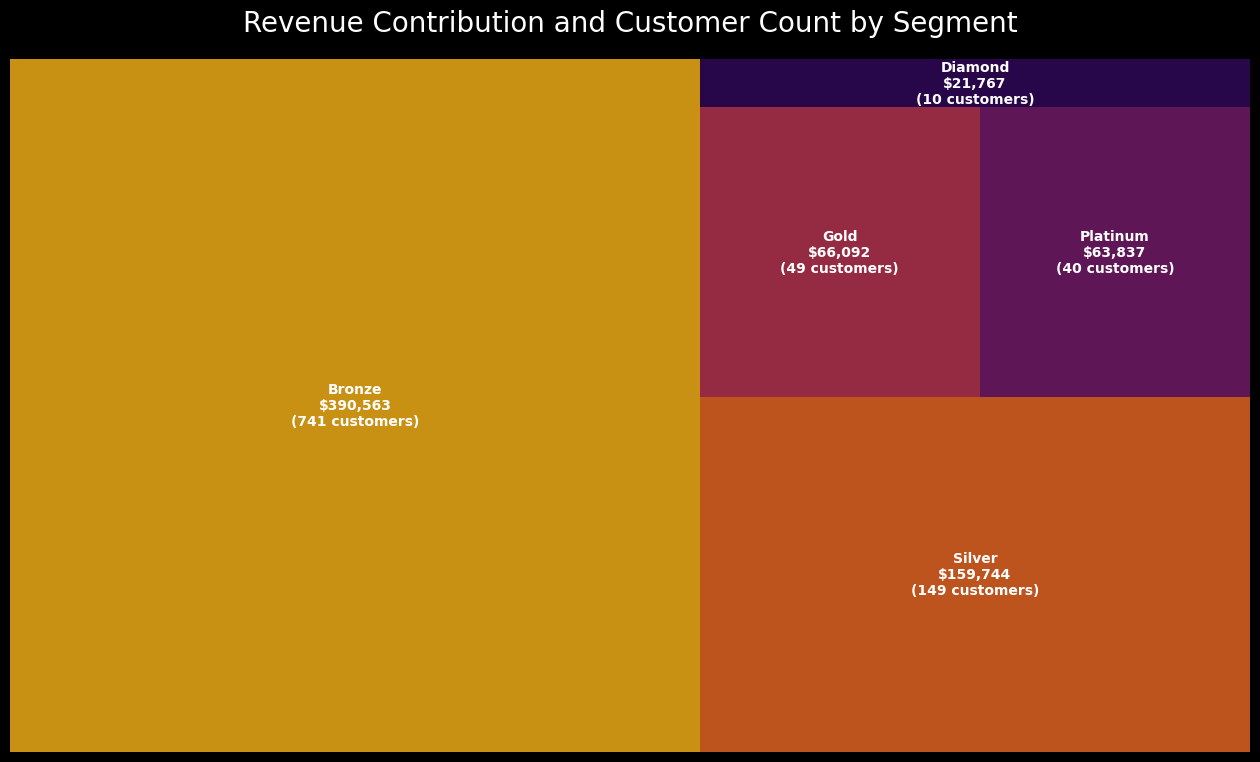

In [57]:
segment_value_df = segment_value_df.sort_values('TotalRevenueBySegment', ascending=False)
switch_plot_mode("dark")

plt.figure(figsize=(16, 9))

sizes = segment_value_df['TotalRevenueBySegment']

labels = [
    f"{row.CustomerSegment}\n${row.TotalRevenueBySegment:,.0f}\n({row.NumberOfCustomers} customers)"
    for index, row in segment_value_df.iterrows()
]

colors = sns.color_palette("inferno_r", len(segment_value_df))

squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'color': 'white', 'fontweight': 'bold'}
)

plt.title('Revenue Contribution and Customer Count by Segment', fontsize=20, pad=20)
# We don't need axes for a treemap
plt.axis('off')
plt.show()



### **Objective**

To address the core business problems of "ineffective customer segmentation" and "lack of insights into customer behavior." Our goal is to move from a one-size-fits-all approach to a data-driven, tiered strategy that enables targeted marketing and improves customer retention.

### **Methodology**

We implemented a five-tier value-based segmentation model. Using SQL, we calculated the `TotalSpend` for every customer and then segmented them based on spending percentiles. This data-driven approach ensures our segments are meaningful and reflective of the actual customer base.

The segments are defined as:
- **Diamond:** Top 1% of spenders
- **Platinum:** Next 4% (95th-99th percentile)
- **Gold:** Next 5% (90th-95th percentile)
- **Silver:** Next 15% (75th-90th percentile)
- **Bronze:** Bottom 75% of spenders

### **Key Findings**

#### **Finding 1: Revenue is Heavily Concentrated in a Small Cohort of High-Value Customers**

The analysis reveals a classic Pareto Principle distribution, where a minority of customers drive a majority of the value.

| Customer Segment | % of Customers | % of Total Revenue | Key Insight |
| :--- | :--- | :--- | :--- |
| **Bronze** | 75% | 55.6% | The foundational mass market. |
| **Silver** | 15% | 22.8% | The key group for potential growth. |
| **Gold** | 5% | 9.4% | Core high-value spenders. |
| **Platinum** | 4% | 9.1% | VIP customers. |
| **Diamond** | 1% | 3.1% | The super-elite, most valuable group. |

*   **Core Insight:** The top 25% of our customers (`Silver` tier and above) generate nearly **45%** of our total revenue. The top 10% (`Gold` and above) are responsible for over **21%** of revenue. This confirms that a tiered approach to customer management is essential.

#### **Finding 2: The "Silver" Tier Represents the Most Significant Growth Opportunity**

*   **Evidence:** The Silver segment is the second-largest contributor to revenue (22.8%) and contains a substantial number of engaged customers (149). They have demonstrated a clear willingness to spend but have not yet reached the highest levels of loyalty.
*   **Implication:** This segment is the primary battleground for customer development. Converting even a small fraction of these Silver customers into Gold customers would result in a significant uplift in overall revenue.

### **Visualization: Revenue & Customer Distribution by Segment**

The treemap powerfully illustrates the value concentration. The `Bronze` segment, while physically the largest block of revenue, is comprised of over 740 customers. In contrast, the `Diamond` segment, a small sliver on the map, represents the spending power of just 10 individuals. This highlights the "value density" of our top-tier customers.

### **Actionable Business Recommendations**

1.  **Implement a Tiered Loyalty Program:**
    *   **Goal:** To increase retention among high-value customers and incentivize growth in mid-tier customers.
    *   **Actions:**
        *   **Diamond/Platinum:** Offer exclusive benefits like personal shopping, early access to new products, and dedicated customer support lines.
        *   **Silver:** Create targeted "Spend & Get" campaigns to encourage them to reach the Gold tier.
        *   **Bronze:** Focus on broad engagement through general newsletters and store-wide sales.

2.  **Launch Segmented Marketing Campaigns:**
    *   **Goal:** To increase marketing efficiency and ROI by tailoring messages to the appropriate audience.
    *   **Actions:**
        *   Stop sending generic, store-wide emails to everyone.
        *   Create separate email streams for each segment, promoting products and offers relevant to their spending habits.
        *   Use the "exclusive" nature of the top tiers as a key marketing message to Silver customers.

3.  **Allocate Customer Service Resources Strategically:**
    *   **Goal:** To minimize churn among the most valuable customers.
    *   **Actions:** Flag `Diamond` and `Platinum` customers in the CRM system to ensure any support tickets they raise are prioritized and receive exemplary service. The cost of losing one of these customers is far greater than the cost of providing premium support.

## Customer Segmentation based on Behavioural Analysis

Plan for Behavioral Analysis

* Calculate Core Behavioral Metrics: We need to calculate the necessary metrics for every customer.
* Analyze Repeat Purchase Rate
* Create a Loyalty Segment: Group customers based on how often they buy.
* Create a Volume Segment: Group customers based on the total quantity of items they buy.

To calculate the average days between purchases, we need to:

Get the date of every transaction for a customer.

Use the LAG() window function to find the date of the previous transaction.

Calculate the difference in days between the current and previous transaction date.

Finally, AVG() these differences for each customer.

In [58]:
customer_behaviour_query = f"""
{customers_sales_CTE_query},
CustomerTransactionDates AS (
  SELECT
    c.CustomerID,
    DATE('20' || SUBSTR(s.TransactionDate, 7, 2) || '-' || SUBSTR(s.TransactionDate, 4, 2) || '-' || SUBSTR(s.TransactionDate, 1, 2)) AS TransactionDate,
    s.QuantityPurchased
  FROM
    customers_cleaned c
  JOIN
    sales_cleaned s
  ON
    c.CustomerID = s.CustomerID
),
DaysBetweenPurchases AS (
  SELECT
    CustomerID,
    QuantityPurchased,
    JULIANDAY(TransactionDate) - JULIANDAY(LAG(TransactionDate, 1) OVER (PARTITION BY CustomerID ORDER BY TransactionDate)) AS DaysSinceLastPurchase
  FROM
    CustomerTransactionDates
)

SELECT
  c.CustomerID,
  COUNT(DISTINCT s.TransactionID) AS TotalTransactions,
  SUM(s.QuantityPurchased) AS TotalQuantityPurchased,
  AVG(dbp.DaysSinceLastPurchase) AS AvgDaysBetweenPurchases
FROM
  customers_cleaned c
JOIN
  sales_cleaned s ON c.CustomerID = s.CustomerID
JOIN
  DaysBetweenPurchases dbp ON c.CustomerID = dbp.CustomerID
WHERE
    c.CustomerID IN (SELECT CustomerID FROM sales_cleaned GROUP BY CustomerID HAVING COUNT(TransactionID) > 1)
GROUP BY
  c.CustomerID
ORDER BY
    AvgDaysBetweenPurchases ASC
"""

customers_behaviour_df = pd.read_sql(customer_behaviour_query, conn)
customers_behaviour_df.head(10)
customers_behaviour_df.tail(10)


,CustomerID,TotalTransactions,TotalQuantityPurchased,AvgDaysBetweenPurchases
940,269,2,6,148.0
941,322,2,12,152.0
942,674,2,10,153.0
943,668,2,6,154.0
944,636,2,10,155.0
945,841,2,12,161.0
946,91,2,12,164.0
947,444,2,6,171.0
948,818,2,14,174.0
949,123,2,8,195.0


In [59]:
customer_behaviour_segment_threshold_query = f"""
{customers_sales_CTE_query},
CustomerTransactionDates AS (
  SELECT
    c.CustomerID,
    DATE('20' || SUBSTR(s.TransactionDate, 7, 2) || '-' || SUBSTR(s.TransactionDate, 4, 2) || '-' || SUBSTR(s.TransactionDate, 1, 2)) AS TransactionDate,
    s.QuantityPurchased
  FROM
    customers_cleaned c
  JOIN
    sales_cleaned s
  ON
    c.CustomerID = s.CustomerID
),
DaysBetweenPurchases AS (
  SELECT
    CustomerID,
    QuantityPurchased,
    JULIANDAY(TransactionDate) - JULIANDAY(LAG(TransactionDate, 1) OVER (PARTITION BY CustomerID ORDER BY TransactionDate)) AS DaysSinceLastPurchase
  FROM
    CustomerTransactionDates
),
CustomerBehaviour AS (
  SELECT
    c.CustomerID,
    COUNT(DISTINCT s.TransactionID) AS TotalTransactions,
    SUM(s.QuantityPurchased) AS TotalQuantityPurchased,
    AVG(dbp.DaysSinceLastPurchase) AS AvgDaysBetweenPurchases
  FROM
    customers_cleaned c
  JOIN
    sales_cleaned s ON c.CustomerID = s.CustomerID
  JOIN
    DaysBetweenPurchases dbp ON c.CustomerID = dbp.CustomerID
  WHERE
      c.CustomerID IN (SELECT CustomerID FROM sales_cleaned GROUP BY CustomerID HAVING COUNT(TransactionID) > 1)
  GROUP BY
    c.CustomerID
  ORDER BY
      AvgDaysBetweenPurchases ASC
),
RankedBehaviour AS (
  SELECT
    AvgDaysBetweenPurchases,
    ROW_NUMBER() OVER (ORDER BY AvgDaysBetweenPurchases) AS FrequencyRank,
    COUNT(*) OVER () AS CustomerCount
  FROM
    CustomerBehaviour
)
SELECT
  (SELECT AvgDaysBetweenPurchases FROM RankedBehaviour WHERE FrequencyRank = CAST(CustomerCount * 0.33 AS INTEGER)) AS P33_Threshold,
  (SELECT AvgDaysBetweenPurchases FROM RankedBehaviour WHERE FrequencyRank = CAST(CustomerCount * 0.66 AS INTEGER)) AS P66_Threshold

FROM RankedBehaviour
LIMIT 1;
"""

customer_behaviour_segments_df = pd.read_sql(customer_behaviour_segment_threshold_query, conn)
customer_behaviour_segments_df

,P33_Threshold,P66_Threshold
0,25.166667,38.25


so we can say, that our customers will fall into three segments:

1. frequent : those who make a purchase every 25 days or so
2. regular : those who make a purchase every 38 days or so
3. infrequent : those who make a purchase every more than 38 days

In [60]:
segmentation_q = f"""
{customers_sales_CTE_query},
CustomerValue AS (
  SELECT
    c.CustomerID,
    SUM(p.Price * s.QuantityPurchased) AS TotalSpend
  FROM
    sales_cleaned s
  JOIN
    customers_cleaned c ON s.CustomerID = c.CustomerID
  JOIN
    products p ON s.ProductID = p.ProductID
  GROUP BY
    c.CustomerID

),
CustomerFrequency AS (
  SELECT
    CustomerID,
    AVG(DaysSinceLastPurchase) AS AvgDaysBetweenPurchases
  FROM (
    SELECT
      CustomerID,
      JULIANDAY(DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)))
        -
      JULIANDAY(LAG(DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)), 1)
      OVER (PARTITION BY CustomerID ORDER BY DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2))))
      AS DaysSinceLastPurchase
    FROM sales_cleaned
    )
  WHERE DaysSinceLastPurchase IS NOT NULL
  GROUP BY CustomerID
)
SELECT
  c.CustomerID,
  val.TotalSpend,
  freq.AvgDaysBetweenPurchases,

  CASE
    WHEN val.TotalSpend > {customer_quantiles_df['P99_Threshold'][0]} THEN 'Diamond'
    WHEN val.TotalSpend > {customer_quantiles_df['P95_Threshold'][0]} THEN 'Platinum'
    WHEN val.TotalSpend > {customer_quantiles_df['P90_Threshold'][0]} THEN 'Gold'
    WHEN val.TotalSpend > {customer_quantiles_df['P75_Threshold'][0]} THEN 'Silver'
    WHEN val.TotalSpend IS NOT NULL THEN 'Bronze'
    ELSE 'Inactive'
  END AS ValueSegment,

  CASE
    WHEN freq.AvgDaysBetweenPurchases <= {customer_behaviour_segments_df['P33_Threshold'][0]} THEN 'Frequent'
    WHEN freq.AvgDaysBetweenPurchases <= {customer_behaviour_segments_df['P66_Threshold'][0]} THEN 'Regular'
    WHEN freq.AvgDaysBetweenPurchases > {customer_behaviour_segments_df['P66_Threshold'][0]} THEN 'Infrequent'
    WHEN val.TotalSpend IS NOT NULL THEN 'One-Time Buyer'
    ELSE 'Inactive'
  END AS FrequencySegment
FROM
  customers_cleaned c
LEFT JOIN
  CustomerValue val ON val.CustomerID = c.CustomerID
LEFT JOIN
  CustomerFrequency freq on freq.CustomerID = c.CustomerID
ORDER BY
    CASE
        WHEN ValueSegment = 'Diamond'  THEN 1
        WHEN ValueSegment = 'Platinum' THEN 2
        WHEN ValueSegment = 'Gold'     THEN 3
        WHEN ValueSegment = 'Silver'   THEN 4
        WHEN ValueSegment = 'Bronze'   THEN 5
        ELSE 6
    END,

    CASE
        WHEN FrequencySegment = 'Frequent'       THEN 1
        WHEN FrequencySegment = 'Regular'        THEN 2
        WHEN FrequencySegment = 'Infrequent'     THEN 3
        WHEN FrequencySegment = 'One-Time Buyer' THEN 4
        ELSE 5
    END
"""
segmentation_df = pd.read_sql(segmentation_q, conn)
# segmentation_df[segmentation_df['AvgDaysBetweenPurchases'].isna()]


In [61]:
segmentation_df.tail(30)

,CustomerID,TotalSpend,AvgDaysBetweenPurchases,ValueSegment,FrequencySegment
970,464,10.95,NaN,Bronze,One-Time Buyer
971,479,254.91,NaN,Bronze,One-Time Buyer
972,487,60.92,NaN,Bronze,One-Time Buyer
973,496,94.50,NaN,Bronze,One-Time Buyer
974,528,170.36,NaN,Bronze,One-Time Buyer
975,545,156.81,NaN,Bronze,One-Time Buyer
976,555,22.27,NaN,Bronze,One-Time Buyer
977,595,73.53,NaN,Bronze,One-Time Buyer
978,603,171.56,NaN,Bronze,One-Time Buyer
979,680,92.49,NaN,Bronze,One-Time Buyer


In [62]:
visualization_data_q = segmentation_q = f"""
{sales_CTE_query},
CustomerValue AS (
  SELECT
    c.CustomerID,
    SUM(p.Price * s.QuantityPurchased) AS TotalSpend
  FROM
    sales_cleaned s
  JOIN
    customers c ON s.CustomerID = c.CustomerID
  JOIN
    products p ON s.ProductID = p.ProductID
  GROUP BY
    c.CustomerID

),
CustomerFrequency AS (
  SELECT
    CustomerID,
    AVG(DaysSinceLastPurchase) AS AvgDaysBetweenPurchases
  FROM (
    SELECT
      CustomerID,
      JULIANDAY(DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)))
        -
      JULIANDAY(LAG(DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2)), 1)
      OVER (PARTITION BY CustomerID ORDER BY DATE('20' || SUBSTR(TransactionDate, 7, 2) || '-' || SUBSTR(TransactionDate, 4, 2) || '-' || SUBSTR(TransactionDate, 1, 2))))
      AS DaysSinceLastPurchase
    FROM sales_cleaned
    )
  WHERE DaysSinceLastPurchase IS NOT NULL
  GROUP BY CustomerID
),
FinalCustomerMatrix AS (
  SELECT
  c.CustomerID,
  val.TotalSpend,
  freq.AvgDaysBetweenPurchases,

  CASE
    WHEN val.TotalSpend > {customer_quantiles_df['P99_Threshold'][0]} THEN 'Diamond'
    WHEN val.TotalSpend > {customer_quantiles_df['P95_Threshold'][0]} THEN 'Platinum'
    WHEN val.TotalSpend > {customer_quantiles_df['P90_Threshold'][0]} THEN 'Gold'
    WHEN val.TotalSpend > {customer_quantiles_df['P75_Threshold'][0]} THEN 'Silver'
    WHEN val.TotalSpend IS NOT NULL THEN 'Bronze'
    ELSE 'Inactive'
  END AS ValueSegment,

  CASE
    WHEN freq.AvgDaysBetweenPurchases <= {customer_behaviour_segments_df['P33_Threshold'][0]} THEN 'Frequent'
    WHEN freq.AvgDaysBetweenPurchases <= {customer_behaviour_segments_df['P66_Threshold'][0]} THEN 'Regular'
    WHEN freq.AvgDaysBetweenPurchases > {customer_behaviour_segments_df['P66_Threshold'][0]} THEN 'Infrequent'
    WHEN val.TotalSpend IS NOT NULL THEN 'One-Time Buyer'
    ELSE 'Inactive'
  END AS FrequencySegment
FROM
  customers c
LEFT JOIN
  CustomerValue val ON val.CustomerID = c.CustomerID
LEFT JOIN
  CustomerFrequency freq on freq.CustomerID = c.CustomerID
ORDER BY
    CASE
        WHEN ValueSegment = 'Diamond'  THEN 1
        WHEN ValueSegment = 'Platinum' THEN 2
        WHEN ValueSegment = 'Gold'     THEN 3
        WHEN ValueSegment = 'Silver'   THEN 4
        WHEN ValueSegment = 'Bronze'   THEN 5
        ELSE 6
    END,

    CASE
        WHEN FrequencySegment = 'Frequent'       THEN 1
        WHEN FrequencySegment = 'Regular'        THEN 2
        WHEN FrequencySegment = 'Infrequent'     THEN 3
        WHEN FrequencySegment = 'One-Time Buyer' THEN 4
        ELSE 5
    END
)
SELECT
  ValueSegment,
  FrequencySegment,
  COUNT(CustomerID) AS CustomerCount,
  SUM(TotalSpend) AS TotalRevenue
FROM
  FinalCustomerMatrix
GROUP BY
  ValueSegment,
  FrequencySegment
"""

viz_df = pd.read_sql(visualization_data_q, conn)
value_order = ['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze', 'Inactive']
frequency_order = ['Frequent', 'Regular', 'Infrequent', 'One-Time Buyer', 'Inactive']

viz_df['ValueSegment'] = pd.Categorical(viz_df['ValueSegment'], categories=value_order, ordered=True)
viz_df['FrequencySegment'] = pd.Categorical(viz_df['FrequencySegment'], categories=frequency_order, ordered=True)
viz_df

,ValueSegment,FrequencySegment,CustomerCount,TotalRevenue
0,Bronze,Frequent,167,101400.91
1,Bronze,Infrequent,316,144106.69
2,Bronze,One-Time Buyer,39,5458.97
3,Bronze,Regular,219,139596.78
4,Diamond,Frequent,9,19885.06
5,Diamond,Regular,1,1882.26
6,Gold,Frequent,33,44523.74
7,Gold,Regular,16,21568.09
8,Inactive,Inactive,11,NaN
9,Platinum,Frequent,34,54460.13


/tmp/ipython-input-63-35602016.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_pivot = viz_df.pivot_table(


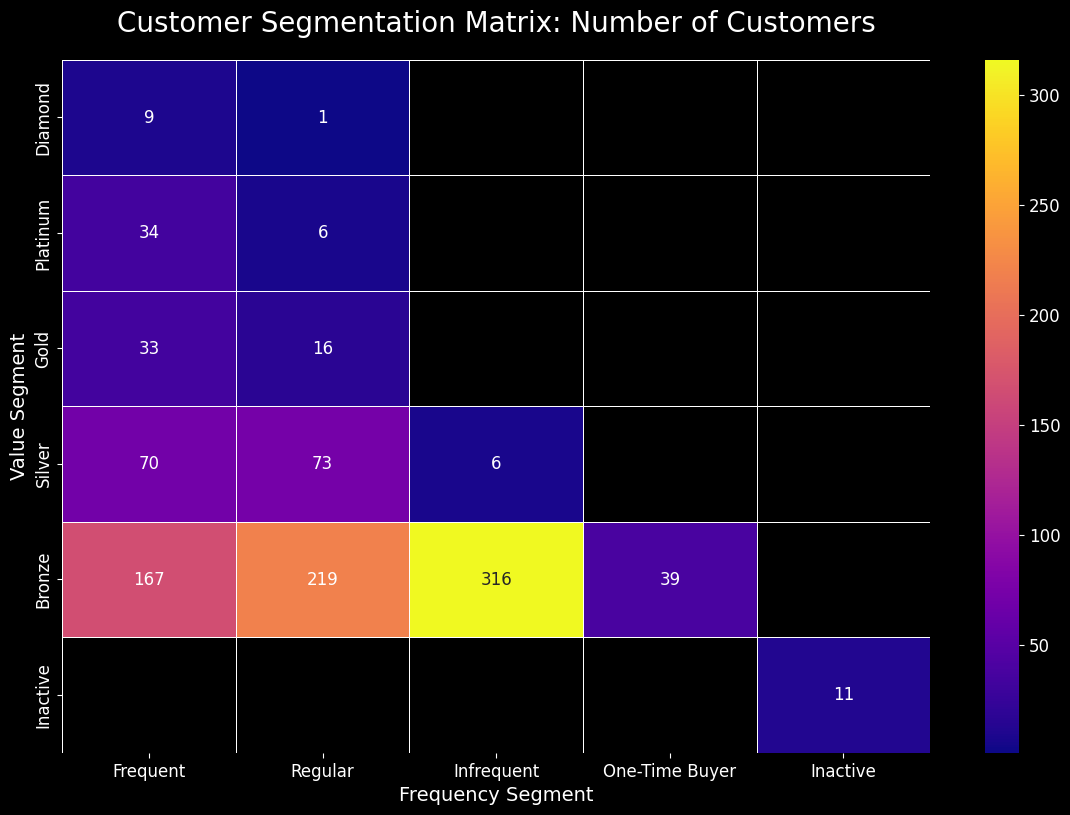

In [63]:
plt.figure(figsize=(14, 9))
heatmap_pivot = viz_df.pivot_table(
    index='ValueSegment',
    columns='FrequencySegment',
    values='CustomerCount'
)
sns.heatmap(
    heatmap_pivot,
    annot=True,
    fmt='.0f',
    cmap='plasma',
    linewidths=.5
)

plt.title('Customer Segmentation Matrix: Number of Customers', fontsize=20, pad=20)
plt.xlabel('Frequency Segment', fontsize=14)
plt.ylabel('Value Segment', fontsize=14)
plt.show()

## **Deep Dive into Customer Behavior & Loyalty**

**Business Problem Addressed:** The company has a "lack of insights into customer purchasing behavior" and needs to understand loyalty to "improve customer retention and satisfaction."

**Analytical Approach:** We moved beyond static value segmentation to analyze dynamic customer behavior. We calculated each customer's `AvgDaysBetweenPurchases` to quantify their purchasing frequency. This allowed us to create a 2D segmentation matrix, crossing our previous **Value Segments** with new **Frequency Segments** (`Frequent`, `Regular`, `Infrequent`, `One-Time Buyer`).

---

### **Key Findings from the Segmentation Matrix**

#### **Finding 1: High-Value Customers Are Also Highly Frequent, Creating an Elite "Champions" Cohort.**

*   **Evidence:** The data reveals a strong correlation between value and frequency at the top end. Our **9 `Diamond` customers are all `Frequent` or `Regular` shoppers**. Similarly, **34 of our 40 `Platinum` customers are `Frequent`**. This top-left corner of our heatmap represents a small but immensely valuable group of highly engaged, loyal customers. The `Diamond/Frequent` segment alone, with just 9 customers, generates nearly $20,000 in revenue.
*   **Business Implication:** This is our most valuable asset. The primary strategic goal for this segment is **retention and recognition**. They are not prospects to be "sold to"; they are partners to be valued. Losing even one of these customers would be a significant financial blow.

#### **Finding 2: A Significant Portion of "Bronze" Customers Are at High Risk of Churn.**

*   **Evidence:** The `Bronze` segment, our largest, is not a monolith. It contains **316 `Infrequent`** repeat customers and **39 `One-Time Buyers`**. Combined, this group of over 350 customers has either a weak or non-existent purchasing habit.
*   **Business Implication:** This is the company's "leaky bucket." While these are low-value customers individually, their large number represents a massive, untapped opportunity. A small improvement in the retention rate or the successful activation of `One-Time Buyers` into repeat purchasers could have a larger impact on revenue than trying to upsell a single `Diamond` customer.

#### **Finding 3: The "Silver/Regular" and "Silver/Frequent" Segments Are the Key Growth Engine.**

*   **Evidence:** The data shows a large concentration of customers in the `Silver` tier who are also `Frequent` (70 customers) or `Regular` (73 customers). This group of **143 customers** is both valuable *and* engaged. They represent the sweet spot of customers who have proven their loyalty and have the potential to spend more.
*   **Business Implication:** This is the most important segment for proactive marketing aimed at **customer development**. The strategic goal is to "graduate" these customers into the `Gold` tier. They are the most likely to respond positively to targeted promotions, product recommendations, and incentives designed to increase their average order value.

### **Visualization: The Customer Segmentation Heatmap**


The heatmap clearly visualizes these findings. The "hotspots" in the top-left (`Diamond/Frequent`) and the large numbers in the bottom-right (`Bronze/Infrequent` and `Bronze/Regular`) tell a compelling story about where the company's value is concentrated and where the biggest risks and opportunities lie.

---


In [64]:
conn.close()